# MIE1624 Introduction to Data Science and Analytics

## Assignment#1 KaggleSalary DayaSet Analysis

## Zichuan Wang - 1000474300

## 0 The purpose of this assignment:


1.   understand and explore employment in the data science community, as represented in a survey conducted by Kaggle.
2.   train, validate, and tune multi-class ordinary classification problem that can classify, given a set of survey responses by a data scientist, what a survey respondent’s current yearly compensation bucket is.

### 0.1 Import libraries:

In [81]:
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scikit-learn
#!pip3 install matplotlib
#!pip3 install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import warnings

sns.set_style('whitegrid')

# The following line is needed to show plots inline in notebooks
%matplotlib inline 

### 0.2 Question list:

Q1. What is your age (# years)?	
Q2. What is your gender? - Selected Choice	
Q3. In which country do you currently reside?	
Q4. What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  
Q5. Select the title most similar to your current role (or most recent title if retired): - Selected Choice	
Q6. What is the size of the company where you are employed?	
Q7. Approximately how many individuals are responsible for data science workloads at your place of business?    
Q8. Does your current employer incorporate machine learning methods into their business?   
Q9. Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice   
Q10. What is your current yearly compensation (approximate $USD)?	
Q11. Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?	
Q12. Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice	
Q13. On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice	
Q14. What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice	
Q15. How long have you been writing code to analyze data (at work or at school)?	
Q16. Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice	
Q17. Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply) - Selected Choice	
Q18. What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice	
Q19. What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice	
Q20. What data visualization libraries or tools do you use on a regular basis?  (Select all that apply) - Selected Choice   
Q21. Which types of specialized hardware do you use on a regular basis?  (Select all that apply) - Selected Choice	
Q22. Have you ever used a TPU (tensor processing unit)?	
Q23. For how many years have you used machine learning methods?	
Q24. Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice	
Q25. Which categories of ML tools do you use on a regular basis?  (Select all that apply) - Selected Choice	
Q26. Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice   
Q27. Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice	
Q28. Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice	
Q29. Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice	
Q30. Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice	
Q31. Which specific big data / analytics products do you use on a regular basis? (Select all that apply) - Selected Choice   
Q32. Which of the following machine learning products do you use on a regular basis? (Select all that apply) - Selected Choice	
Q33. Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice	
Q34. Which of the following relational database products do you use on a regular basis? (Select all that apply) - Selected Choice

## 1. Data cleaning (20 marks):
While the data is made ready for analysis, several values are missing, and some features are categorical. Note that some values that appear “null” indicate that a survey respondent did not select that given option from a multiple-choice list. For example – “Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)”     
For the data cleaning step, handle missing values however you see fit and justify your approach. Provide some insight on why you think the values are missing and how your approach might impact the overall analysis. Suggestions include filling the missing values with a certain value (e.g. mode for categorical data) and completely removing the features with missing values. Secondly, convert 3/6 MIE 1624 Introduction to Data Science and Analytics – Assignment 1 categorical data into numerical data by encoding and explain why you used this particular encoding method. These tasks can be done interchangeably, e.g., encoding can be done first.

### 1.1 Load the dataset and set pd view options

In [188]:
pd.set_option('max_rows',20)
pd.set_option('max_columns',800)
train = pd.read_csv('Kaggle_Salary.csv', low_memory = False)

### 1.2 Remove Unrelated Columns
1.   Other test information is not provided, therefore columns with label of "OTHER_TEXT" can be safely dropped.   
2.  Column "Time from Start to Finish (seconds)" doesn't contribute much insight into the dataset, thus can also be dropped.   
3.  Q10 is already encoded and concatenate at the back, thus can be dropped.
4.  Q14 already contains all the infomation to the question, thus subsequent Q14_part can all be dropped

In [189]:
# drop all label with other text
Label_OTHER_TEXT = []
for col in train.columns:
    if ("OTHER" in col):
        Label_OTHER_TEXT.append(col)
Label_OTHER_TEXT
train.drop(labels=Label_OTHER_TEXT, axis=1, inplace=True)
# drop Time from Start to Finish (seconds)
train.drop(['Time from Start to Finish (seconds)'], axis=1,inplace=True)
# drop Q10
train.drop(labels="Q10", axis=1, inplace=True)
# drop Q14_part
features_to_drop_Q14 = []
for col in train.columns:
    if ("Q14_" in col):
        features_to_drop_Q14.append(col)
train.drop(labels=features_to_drop_Q14, axis=1, inplace=True)

### 1.3 Add salary average

In [190]:
salary_average_encode = {   '0-9,999': 5000,
    '10,000-19,999': 15000, 
    '20,000-29,999': 25000,
    '30,000-39,999': 35000,
    '40,000-49,999': 45000,
    '50,000-59,999': 55000,
    '60,000-69,999': 65000,
    '70,000-79,999': 75000,
    '80,000-89,999': 85000,
    '90,000-99,999': 95000,
    '100,000-124,999': 112500,
    '125,000-149,9991': 137500,
    '150,000-199,999': 175000,
    '200,000-249,999': 225000,
    '>250,000': 250000}

In [191]:
train.loc[0:,'Q10_average'] = train.loc[0:,'Q10_buckets'].map(salary_average_encode)

### 1.4 Fill Missing Value

In [192]:
column_headers = list(train.columns.values)

#### 1.4.1 Calculate the number of missing value of non-multiple choice questions

In [193]:
# encode all label with part with one-hot encoding
Label_Part = []
Label_normal = []
for col in train.columns:
    if ("Part" in col):
        Label_Part.append(col)
    if ("_" not in col) and ("Q" in col):
        Label_normal.append(col)
    if ("Q10" in col):
        Label_normal.append(col)

In [194]:
print("Total number and percentage of missing data:")
total_null = train.isnull().sum().sort_values(ascending=False)
percent_null = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
#missing_data.head(25)
Label_normal_null=missing_data.loc[ Label_normal, : ]
Label_normal_null.sort_values(by="Total" , ascending=False)

Total number and percentage of missing data:


,Total,Percent
Q23,1956,0.156518
Q22,1947,0.155797
Q19,1844,0.147555
Q15,1075,0.086021
Q14,1045,0.083620
Q11,247,0.019765
Q10_buckets,0,0.000000
Q10_Encoded,0,0.000000
Q1,0,0.000000
Q2,0,0.000000


#### 1.4.2 Fill missing value of non-multiple choice questions

In [195]:
Q_missing=Label_normal_null[Label_normal_null['Total'] > 246]._stat_axis.values.tolist()
Q_missing

['Q11', 'Q14', 'Q15', 'Q19', 'Q22', 'Q23']

#### 1.4.3 Calculate the number of missing value of multiple choice questions

In [196]:
Label_Part_null=missing_data.loc[ Label_Part, : ]
Label_Part_null.sort_values(by="Total" , ascending=False)

,Total,Percent
Q33_Part_9,12469,0.997759
Q26_Part_7,12456,0.996719
Q27_Part_6,12451,0.996319
Q17_Part_9,12437,0.995199
Q18_Part_11,12428,0.994479
...,...,...
Q24_Part_1,4854,0.388413
Q12_Part_4,4740,0.379291
Q16_Part_1,4682,0.374650
Q21_Part_1,4613,0.369129


#### 1.4.4 Fill missing value of multiple choice questions

To avoid introducing artificial noise into the dataset, we use the mode of each salary bucket to fill the missing value.

In [247]:
salary_buckets_reverse = {    
0:'0-9,999',
1:'10,000-19,999',
2:'20,000-29,999',
3:'30,000-39,999', 
4:'40,000-49,999', 
5:'50,000-59,999',
6:'60,000-69,999',
7:'70,000-79,999', 
8:'80,000-89,999', 
9:'90,000-99,999',
10:'100,000-124,999',
11:'125,000-149,9991',
12:'150,000-199,999',
13:'200,000-249,999',
14:'>250,000'
}

In [198]:
def get_mode(Q): ##return mode of Question in different salary range
    Q10_class=train.Q10_buckets.unique() 
    dic = dict()
    for classes in  Q10_class:
        t=train[train['Q10_buckets']==classes]
        mode_n=t[Q].mode()[0]
        dic.setdefault(classes,mode_n)
    return dic

In [199]:
Q10_class=train.Q10_buckets.unique()
for Q in Q_missing:
    diction=get_mode(Q)
    for classes in Q10_class:
        if train[(train[Q].isnull()) & (train['Q10_buckets']==classes)].shape[0]>0:
            train.at[(train[Q].isnull()) & (train['Q10_buckets']==classes), Q] = diction[classes]

#### 1.4.5 Visualization data after filling missing data

In [200]:
visualization = train
visualization

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q14,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q19,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q10_Encoded,Q10_buckets,Q10_average
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CPUs,GPUs,NaN,NaN,NaN,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"30,000-39,999",35000
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning servic

### 1.5 Encode categorial data

#### 1.5.1 Encode non-ordinal categorical features

For non-ordinal categorical features, dummy variables can be used to encode there features. After scanning through all the questions, 5 questions are found to be of non-ordinal type. These questions are:  
**Q2**: What is your gender?  
**Q5**: Select the title most similar to your current role (or most recent title if retired):   
**Q8**: Does your current employer incorporate machine learning methods into their business?   
**Q14**: What is the primary tool that you use at work or school to analyze data?  
**Q19**: What programming language would you recommend an aspiring data scientist to learn first?  

In [201]:
DummyColumns = ['Q2','Q5','Q8','Q14','Q19']
for col in DummyColumns:
    train= pd.get_dummies(data=train, columns=[col])

In [202]:
# shorten question names for better visualization
Q8_rename = {'Q8_I do not know': 'Q8_Dont know',\
            'Q8_We have well established ML methods (i.e., models in production for more than 2 years)':\
             'Q8_In production for over 2 years',\
             'Q8_No (we do not use ML methods)': 'Q8_Dont use ML',\
             'Q8_We are exploring ML methods (and may one day put a model into production)':\
             'Q8_May be in the future',
             'Q8_We recently started using ML methods (i.e., models in production for less than 2 years)':\
             'Q8_In production for under 2 years',\
             'Q8_We use ML methods for generating insights (but do not put working models into production)':\
             'Q8_For insights only'
            }
Q14_rename = {'Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)':'Q14_Basic statistical software',\
              'Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)':'Q14_Cloud-based data software',
              'Q14_Local development environments (RStudio, JupyterLab, etc.)':'Q14_Local development environments',
              'Q14_Advanced statistical software (SPSS, SAS, etc.)':'Q14_Advanced statistical software', 
              'Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)':'Q14_Business intelligence software',
              'Q14_Other':'Q14_Other'
            }

train = train.rename(Q8_rename,axis='columns')
train = train.rename(Q14_rename,axis='columns')

**Q3**: In which country do you currently reside?   

For 'Q3' 'In which country do you currently reside?', there are a total of 58 countries ranging from total number 3376 to 33. So before getting dummies, we eliminate categories by setting a threshold 50. The countries which have a total number fewer than 50 are changed to 'Other'.

In [203]:
val_counts = train['Q3'].value_counts()
value_mask = train['Q3'].isin(val_counts.index[val_counts < 50])
train.loc[value_mask,'Q3'] = "Other"
train = pd.get_dummies(data=train, columns=['Q3'])

#### 1.5.2 Encode "Select all that apply" questions

For "Select all that apply" questions, 1 indicates that option is selected, NAN indicates that option is not selected. NAN can be replaced by zero to serve the same purpose.

In [204]:
def Binarize(value):
    if isinstance(value,str):
        return 1
    else:
        if value == 0 or math.isnan(value):
            return 0
        else:
            return 1

In [205]:
for col in Label_Part:
    train[col] = train[col].apply(Binarize)

#### 1.5.3 Encode ordinal categorical features

For ordinal categorical features, ordered encode mapping is used to perserve the order infomation. These questions are:    
**Q1**: What is your age (# years)?  
**Q4**: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  
**Q6**: What is the size of the company where you are employed?  
**Q7**: Approximately how many individuals are responsible for data science workloads at your place of business?  
**Q11**: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?  
**Q15**: How long have you been writing code to analyze data (at work or at school)?  
**Q22**: Have you ever used a TPU (tensor processing unit)?  
**Q23**: For how many years have you used machine learning methods?  

In [206]:
def Normalize(value):
    if isinstance(value, str):
        if '-' in value:
            temp = value.split('-')
            return int((float(temp[0])+float(temp[1]))/2)
        if '+' in value:
            a = value.split('+')
            return float(a[0])
        if '>' in value:
            b=value.split('>')
            return float(a[0])
        if '<' in value:
            s=value.split('<')
            return (0+float(s[1]))/2
        else:
            return value
    else:
        return value

**Q1**: What is your age (# years)? 

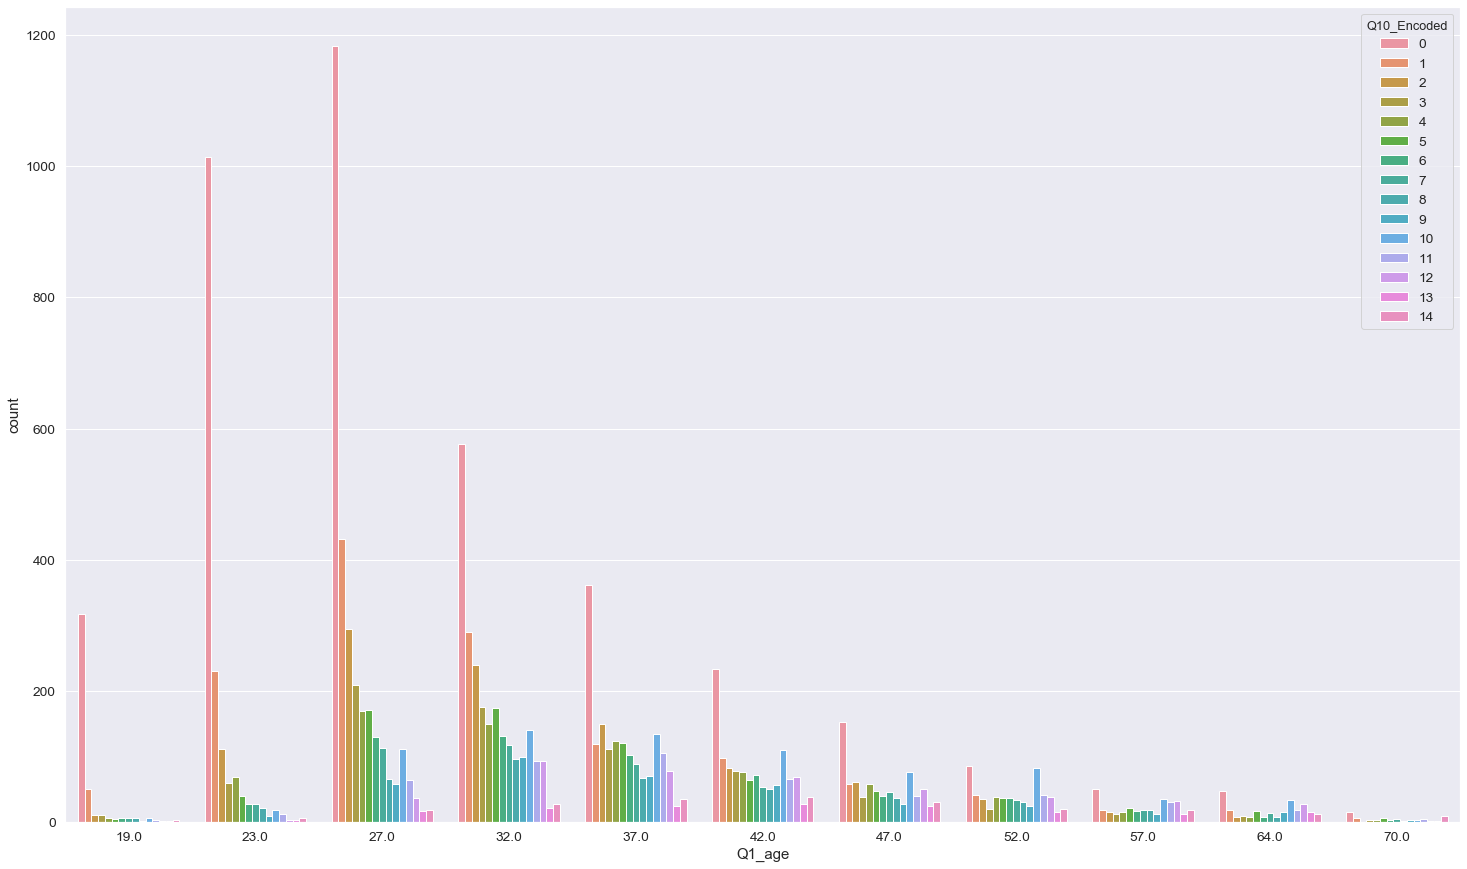

In [207]:
train['Q1_age'] = train['Q1'].apply(Normalize)
train.drop(labels='Q1', axis=1, inplace=True)
fig= plt.subplots(figsize=(25,15))
sns.countplot(x='Q1_age', hue = 'Q10_Encoded', data=train)

**Q4**: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  

In [208]:
education_encode = {   
    'I prefer not to answer': 0,
    'No formal education past high school': 1,
    'Some college/university study without earning a bachelor’s degree': 2, 
    'Professional degree': 3,
    'Bachelor’s degree': 4,
    'Master’s degree': 5, 
    'Doctoral degree': 6,
    }

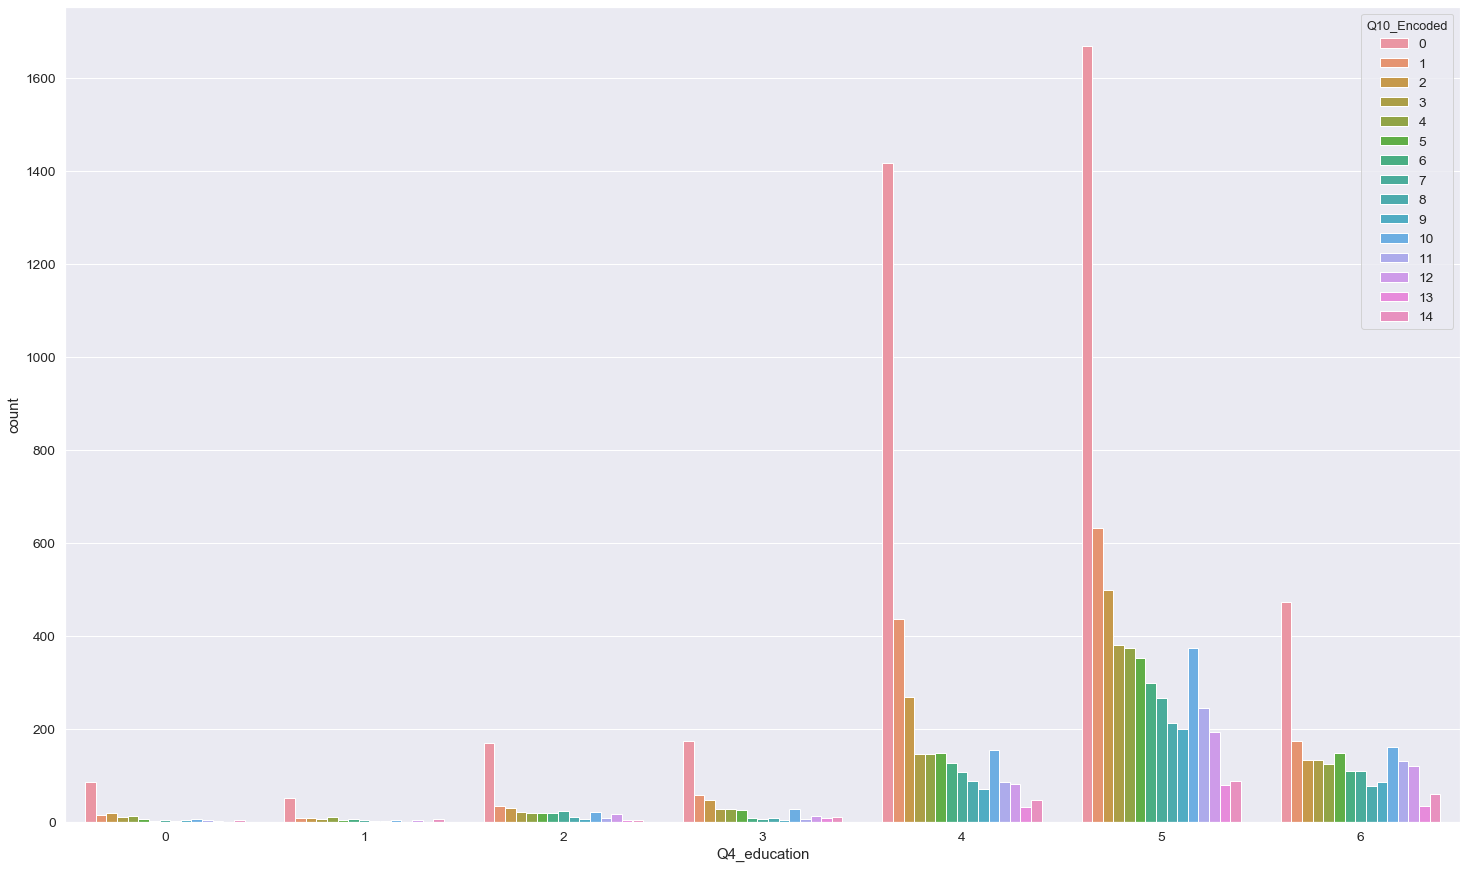

In [209]:
train.loc[0:,'Q4_education'] = train.loc[0:,'Q4'].map(education_encode)
train.loc[0:,'Q4_education']=train.loc[0:,'Q4_education'].astype(int)
train.drop(labels='Q4', axis=1, inplace=True)
fig= plt.subplots(figsize=(25,15))
sns.countplot(x='Q4_education', hue = 'Q10_Encoded', data=train)

**Q6**: What is the size of the company where you are employed?  

In [210]:
companysize_encode = {   
    '0-49 employees': 25,
    '50-249 employees': 150,
    '250-999 employees': 625, 
    '1000-9,999 employees': 5500,
    '> 10,000 employees': 10000,
    }

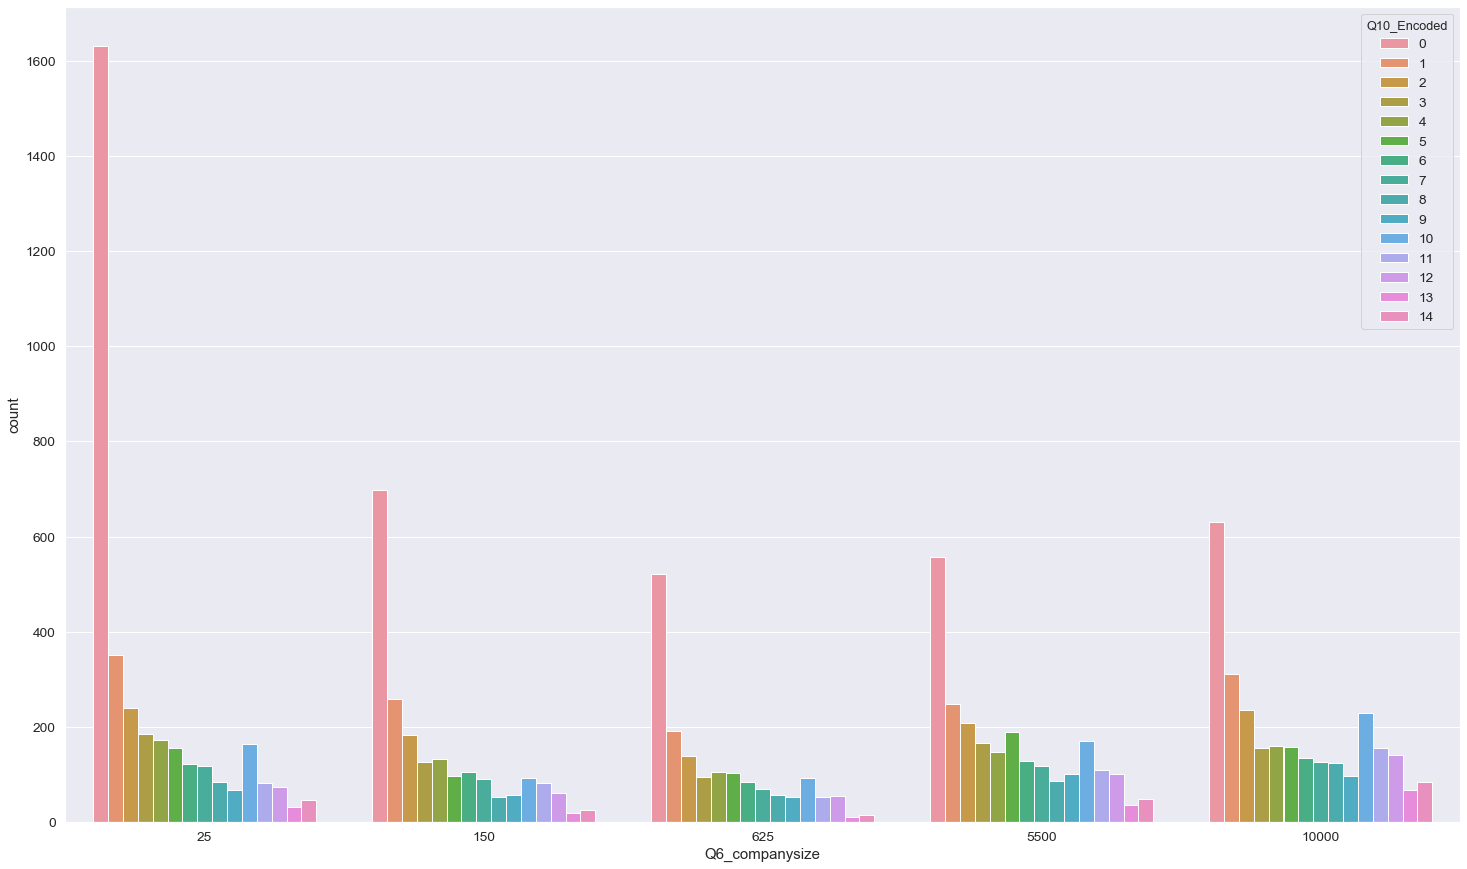

In [211]:
train.loc[0:,'Q6_companysize'] = train.loc[0:,'Q6'].map(companysize_encode)
train.loc[0:,'Q6_companysize']=train.loc[0:,'Q6_companysize'].astype(int)
train.drop(labels='Q6', axis=1, inplace=True)
fig= plt.subplots(figsize=(25,15))
sns.countplot(x='Q6_companysize', hue = 'Q10_Encoded', data=train)

**Q7**: Approximately how many individuals are responsible for data science workloads at your place of business? 

In [212]:
train.Q7.unique() 

array(['0', '20+', '3-4', '1-2', '5-9', '10-14', '15-19'], dtype=object)

In [213]:
teamDS_encode= {   
    '0': 0,
    '1-2': 1.5,
    '3-4': 3.5, 
    '5-9': 7,
    '10-14': 12, 
    '15-19': 17,
    '20+': 20
    }

In [214]:
#train['Q7_responsibleppl'] = train['Q7'].apply(Normalize)
train.loc[0:,'Q7_teamDS'] = train.loc[0:,'Q7'].map(teamDS_encode)
train.loc[0:,'Q7_teamDS']=train.loc[0:,'Q7_teamDS'].astype(int)
train.drop(labels='Q7', axis=1, inplace=True)

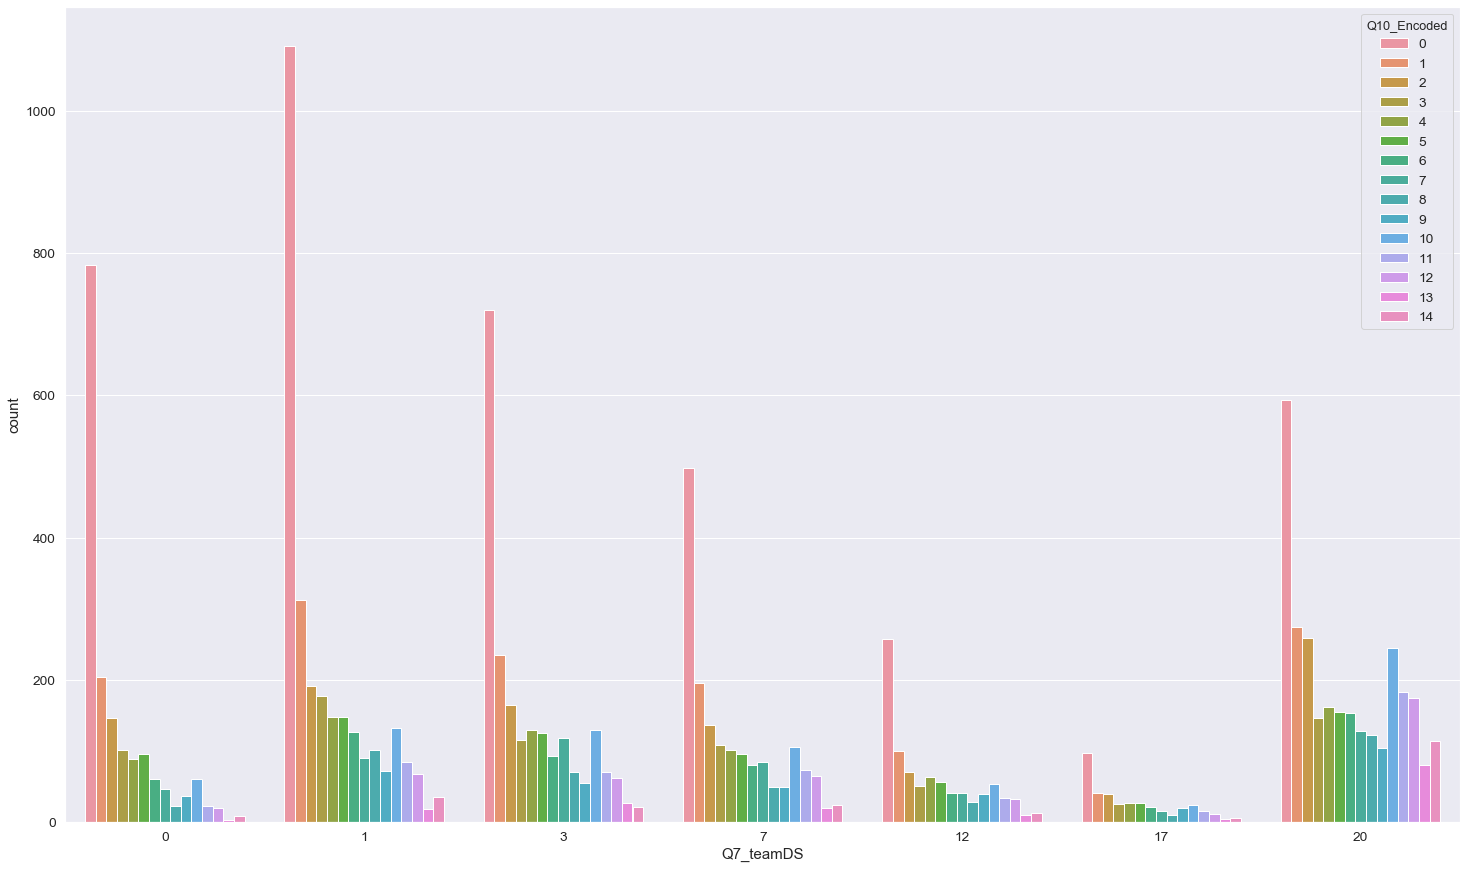

In [215]:
fig= plt.subplots(figsize=(25,15))
sns.countplot(x='Q7_teamDS', hue = 'Q10_Encoded', data=train)

**Q11**: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?  

In [216]:
train.Q11.unique() 

array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99'], dtype=object)

In [217]:
moneyonML_encode= {   
    '$0 (USD)': 0,
    '$1-$99': 50,
    '$100-$999': 500, 
    '$1000-$9,999': 5000,
    '$10,000-$99,999': 55000, 
    '> $100,000 ($USD)': 100000,
    }

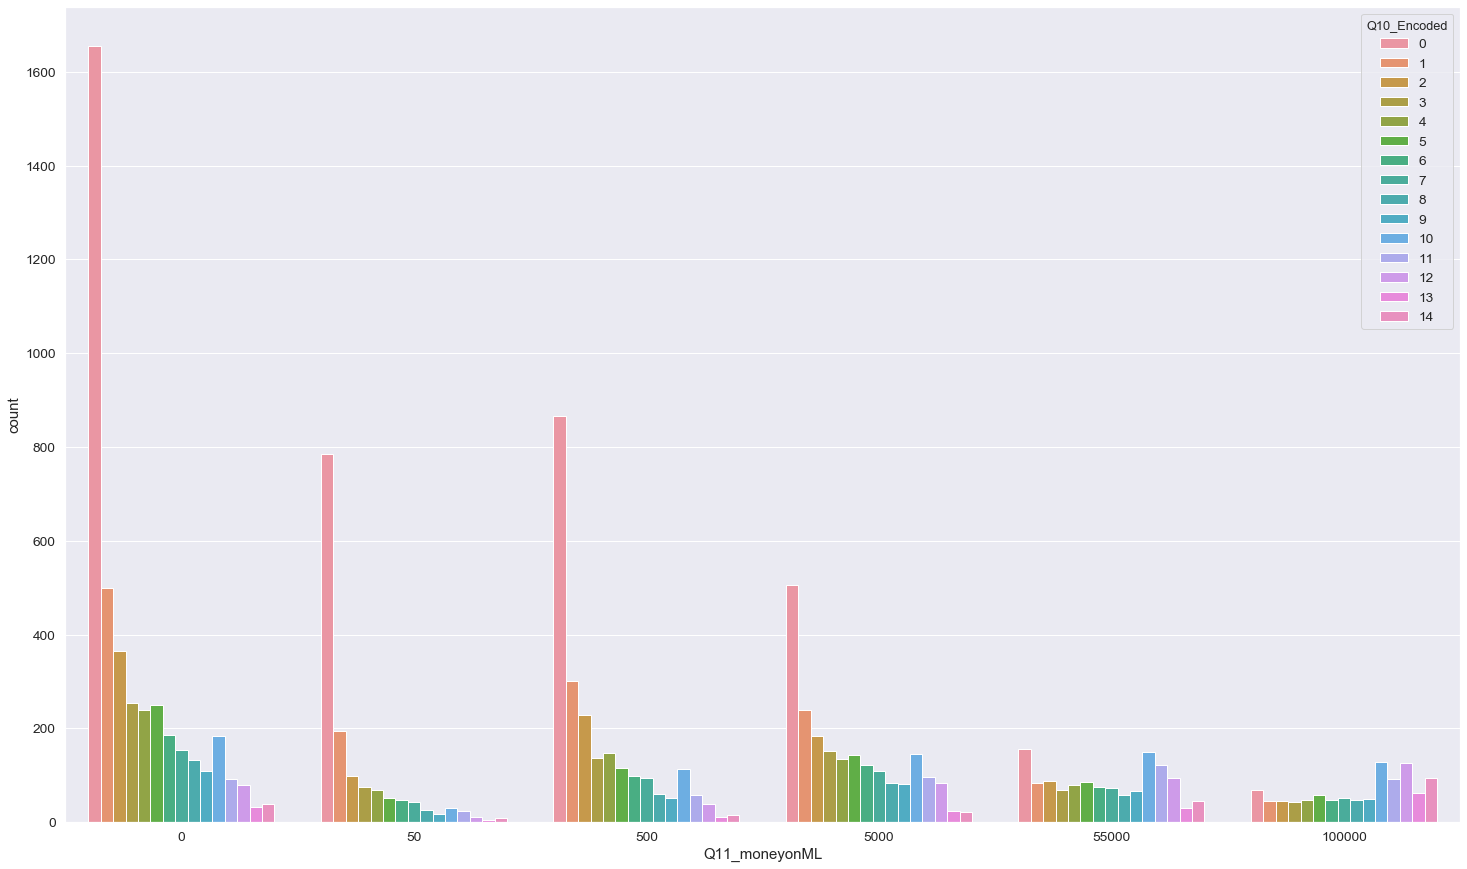

In [218]:
train.loc[0:,'Q11_moneyonML'] = train.loc[0:,'Q11'].map(moneyonML_encode)
train.loc[0:,'Q11_moneyonML']=train.loc[0:,'Q11_moneyonML'].astype(int)
train.drop(labels='Q11', axis=1, inplace=True)
fig= plt.subplots(figsize=(25,15))
sns.countplot(x='Q11_moneyonML', hue = 'Q10_Encoded', data=train)

**Q15**: How long have you been writing code to analyze data (at work or at school)?  

In [219]:
train.Q15.unique()

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years'], dtype=object)

In [220]:
timeoncode_encode= {   
    'I have never written code': 0,
    '< 1 years': 0.5,
    '1-2 years': 1.5, 
    '3-5 years':4,
    '5-10 years':7.5, 
    '10-20 years': 15,
    '20+ years':20
    }
train.loc[0:,'Q15_timeonCode'] = train.loc[0:,'Q15'].map(timeoncode_encode)
train.loc[0:,'Q15_timeonCode']=train.loc[0:,'Q15_timeonCode'].astype(int)
train.drop(labels='Q15', axis=1, inplace=True)

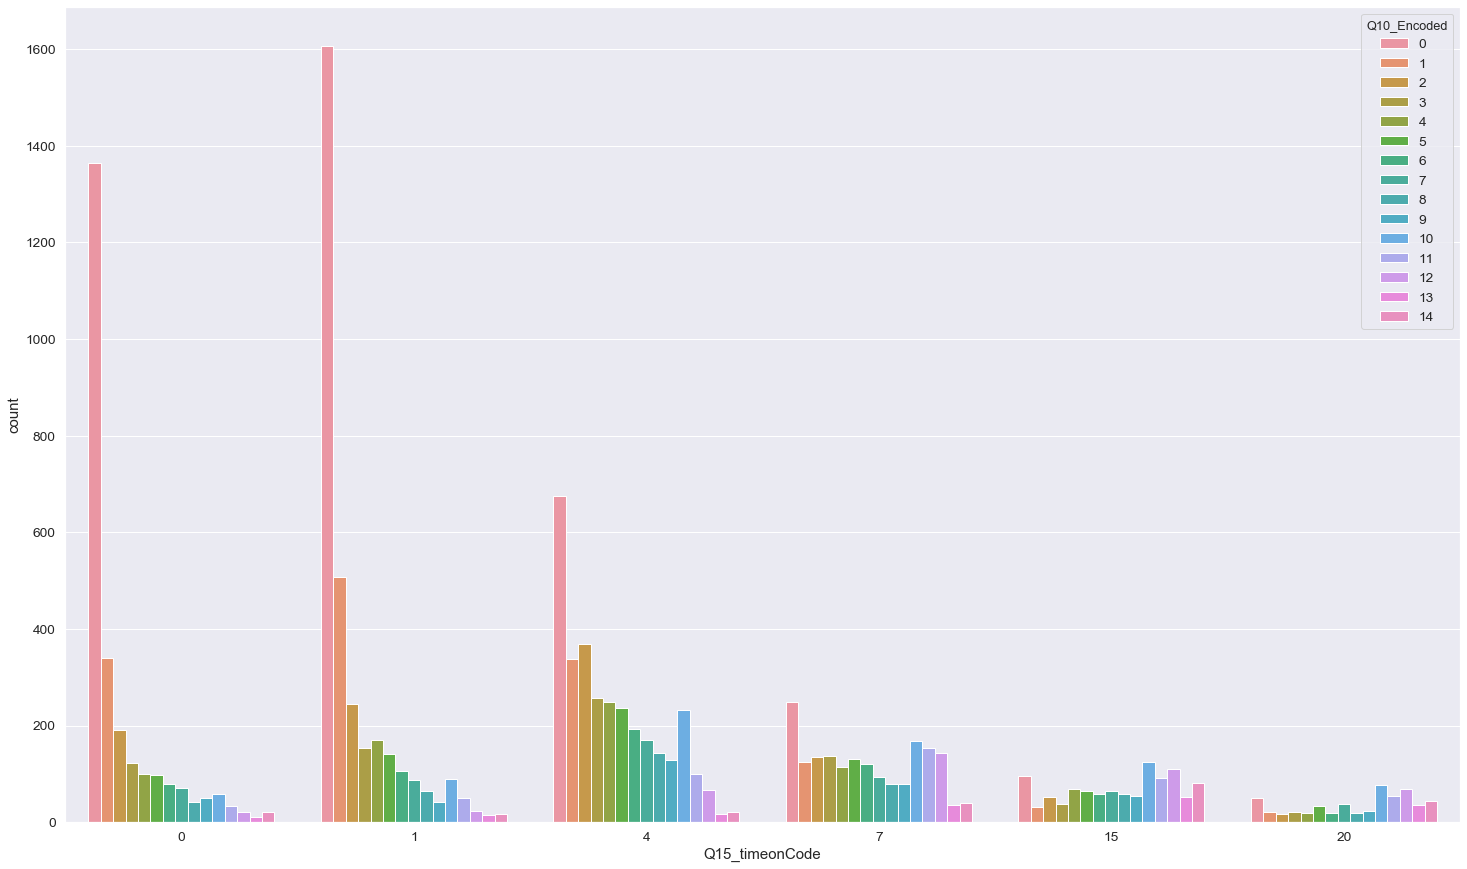

In [221]:
fig= plt.subplots(figsize=(25,15))
sns.countplot(x='Q15_timeonCode', hue = 'Q10_Encoded', data=train)

**Q22**: Have you ever used a TPU (tensor processing unit)?  

In [222]:
train.Q22.unique()

array(['Never', 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

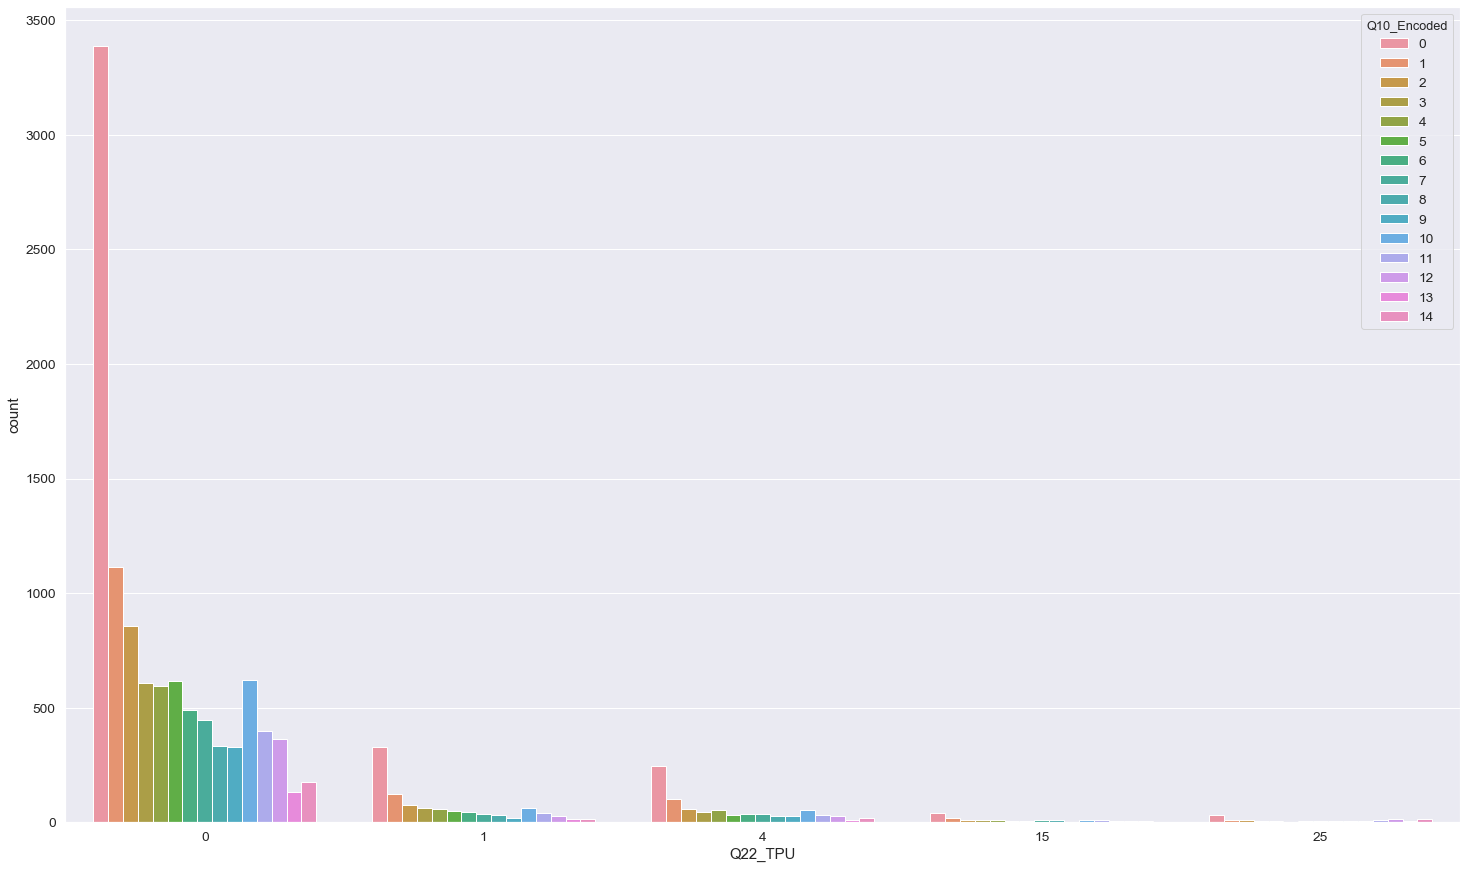

In [223]:
TPU_encode= {   
    'Never': 0,
    'Once': 1,
    '6-24 times': 15, 
    '2-5 times':4,
    '5-10 years':8, 
    '> 25 times': 25,
    }
train.loc[0:,'Q22_TPU'] = train.loc[0:,'Q22'].map(TPU_encode)
train.loc[0:,'Q22_TPU']=train.loc[0:,'Q22_TPU'].astype(int)
train.drop(labels='Q22', axis=1, inplace=True)
fig= plt.subplots(figsize=(25,15))
sns.countplot(x='Q22_TPU', hue = 'Q10_Encoded', data=train)

**Q23**: For how many years have you used machine learning methods? 

In [224]:
train.Q23.unique()

array(['1-2 years', '< 1 years', '2-3 years', '10-15 years', '3-4 years',
       '4-5 years', '5-10 years', '20+ years'], dtype=object)

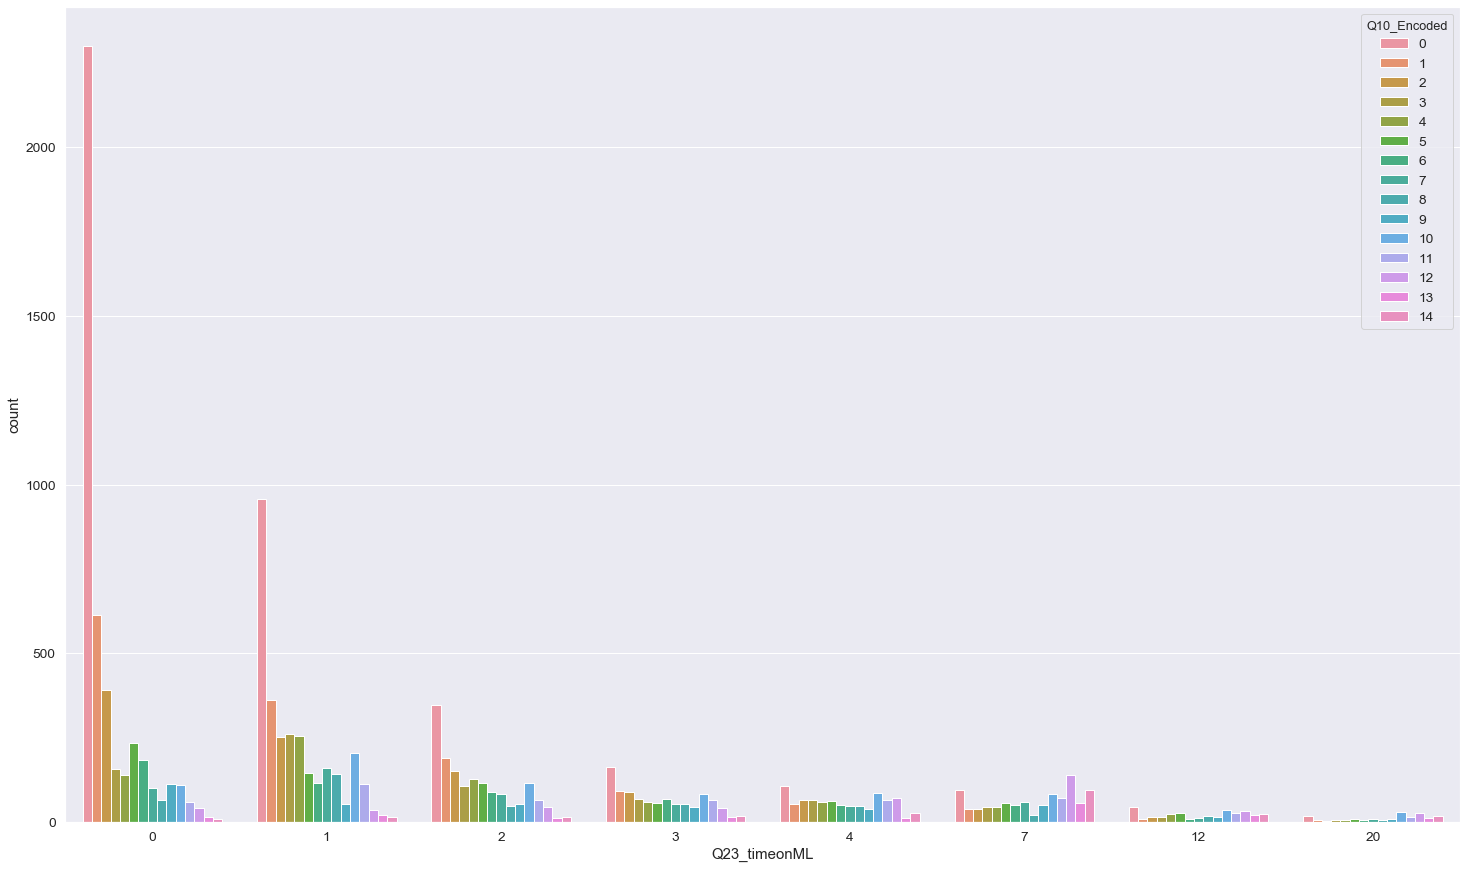

In [225]:
timeonML_encode= {   
    '< 1 years': 0.5,
    '1-2 years': 1.5,
    '2-3 years': 2.5, 
    '3-4 years':3.5,
    '4-5 years':4.5, 
    '5-10 years': 7.5,
    '10-15 years':12.5,
    '20+ years':20,
    }
train.loc[0:,'Q23_timeonML'] = train.loc[0:,'Q23'].map(timeonML_encode)
train.loc[0:,'Q23_timeonML']=train.loc[0:,'Q23_timeonML'].astype(int)
train.drop(labels='Q23', axis=1, inplace=True)
fig= plt.subplots(figsize=(25,15))
sns.countplot(x='Q23_timeonML', hue = 'Q10_Encoded', data=train)

## 2. Exploratory data analysis (15 marks):

### 2.1 Figures representing trends in the data
a. Present 3 graphical figures that represent trends in the data. How could these trends be used to
help with the task of predicting yearly compensation or understanding the data? All graphs
should be readable and presented in the notebook. All axes must be appropriately labelled.

#### 2.1.1 Number of People for each compensation bucket

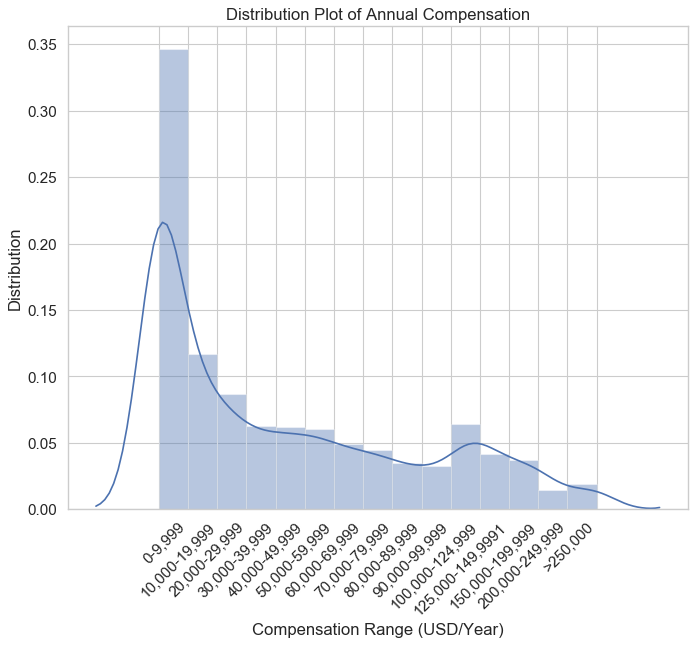

In [252]:
#separate targets and features
df_target = train['Q10_Encoded']
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
fig = sns.distplot(df_target,hist=True,bins=15,norm_hist=True)
loc = np.arange(start=0, stop=14.8, step=14/15)
fig.set_xticks(range(0,15))
locs, labels = plt.xticks()
a=[""]*16
for i in range(1,16):
    a[i] = salary_buckets_reverse[i-1]
fig.set_xticklabels(a)
plt.xticks(rotation=45, ha="right" )
plt.xticks(loc)
plt.xlabel("Compensation Range (USD/Year)")
plt.ylabel("Distribution")
plt.grid(True)
plt.title("Distribution Plot of Annual Compensation") 
plt.show()

> As is shown in the above distribution figure, Compensation distribution is heavily skewed to the left with over 20% people having an annual compensation of less than 10000 USD. Over 50% samples fail into the lowest four compensation buckets. 

In [251]:
# Rename column name for better visualization
temp = visualization
DummyColumns = ['Q4','Q5','Q14']
temp = pd.get_dummies(data=visualization, prefix = "", prefix_sep = "", columns=DummyColumns)
temp = pd.concat([temp, visualization.Q4, visualization.Q5, visualization.Q14], axis=1).\
rename(columns={"Q4": "Education", "Q5": "Job Title", "Q14": "Data Analysis Tool", "Q10_average": "Compensatio"})
#Q6
temp.loc[0:,'Company Size'] = temp.loc[0:,'Q6'].map(companysize_encode)
temp.loc[0:,'Company Size']=temp.loc[0:,'Company Size'].astype(int)
temp.drop(labels='Q6', axis=1, inplace=True)
#Q7 
temp.loc[0:,'DS Team'] = temp.loc[0:,'Q7'].map(teamDS_encode)
temp.loc[0:,'DS Team'] = temp.loc[0:,'DS Team'].astype(int)
temp.drop(labels='Q7', axis=1, inplace=True)
#Q11
temp.loc[0:,'ML Money Spent'] = temp.loc[0:,'Q11'].map(moneyonML_encode)
temp.loc[0:,'ML Money Spent']=temp.loc[0:,'ML Money Spent'].astype(int)
temp.drop(labels='Q11', axis=1, inplace=True)
#Q15
temp.loc[0:,'Coding Experience'] = temp.loc[0:,'Q15'].map(timeoncode_encode)
temp.loc[0:,'Coding Experience']=temp.loc[0:,'Coding Experience'].astype(int)
temp.drop(labels='Q15', axis=1, inplace=True)
#Q23
temp.loc[0:,'ML Time Spent'] = temp.loc[0:,'Q23'].map(timeonML_encode)
temp.loc[0:,'ML Time Spent']=temp.loc[0:,'ML Time Spent'].astype(int)
temp.drop(labels='Q23', axis=1, inplace=True)

In [234]:
#numeric value for education level
salary = temp
salary.loc[0:,'Education_numeric'] = salary.loc[0:,'Education'].map(education_encode)

#### 2.1.2 Compensation by Years of Machine Leanring Usage and Money Spent

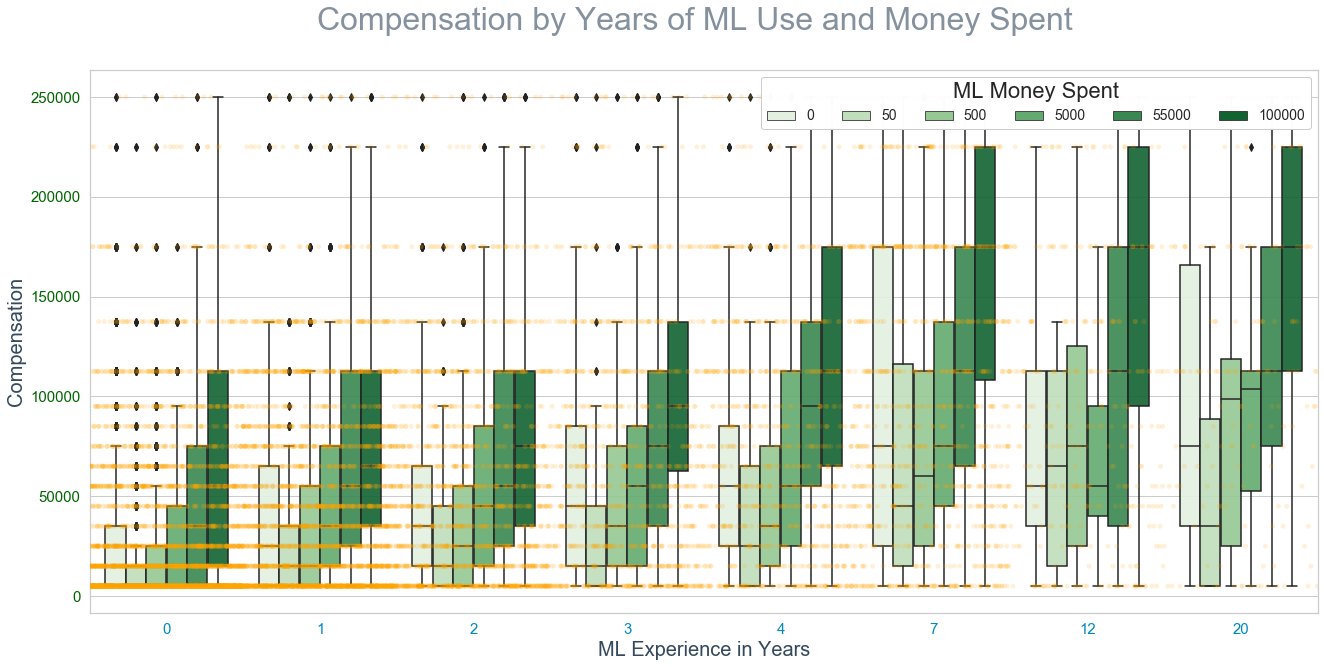

In [235]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))

ax = sns.boxplot(x="ML Time Spent", y="Compensatio", data=salary, hue='ML Money Spent',color='#666666', palette="Greens")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='ML Time Spent', y='Compensatio', data=salary, color="orange", jitter=0.5, size=5,alpha=0.15)

plt.title("Compensation by Years of ML Use and Money Spent", loc="center",size=32,color='#34495E',alpha=0.6)
plt.xlabel('ML Experience in Years',color='#34495E',fontsize=20) 
plt.ylabel('Compensation',color='#34495E',fontsize=20)
plt.xticks(size=15,color='#008abc',rotation='horizontal', wrap=True)
plt.yticks(size=15,color='#006600')
#plt.ylim(0,200)
plt.legend(loc="upper right",fontsize=14,ncol=7,title='ML Money Spent',title_fontsize=22,framealpha=0.99)
plt.show()

> ML money spent: According to the above figure, the respondent who spent moderate amount of money on machine learning has the lowest income. Respondent who spent the most amount of money has the highest average income. Respondent who barely spent any money has medium income.

> ML experience: generally, respondent with more experience has higher income.

#### 2.1.3 Compensation by Coding Experience and Money Spent on Machine Learning

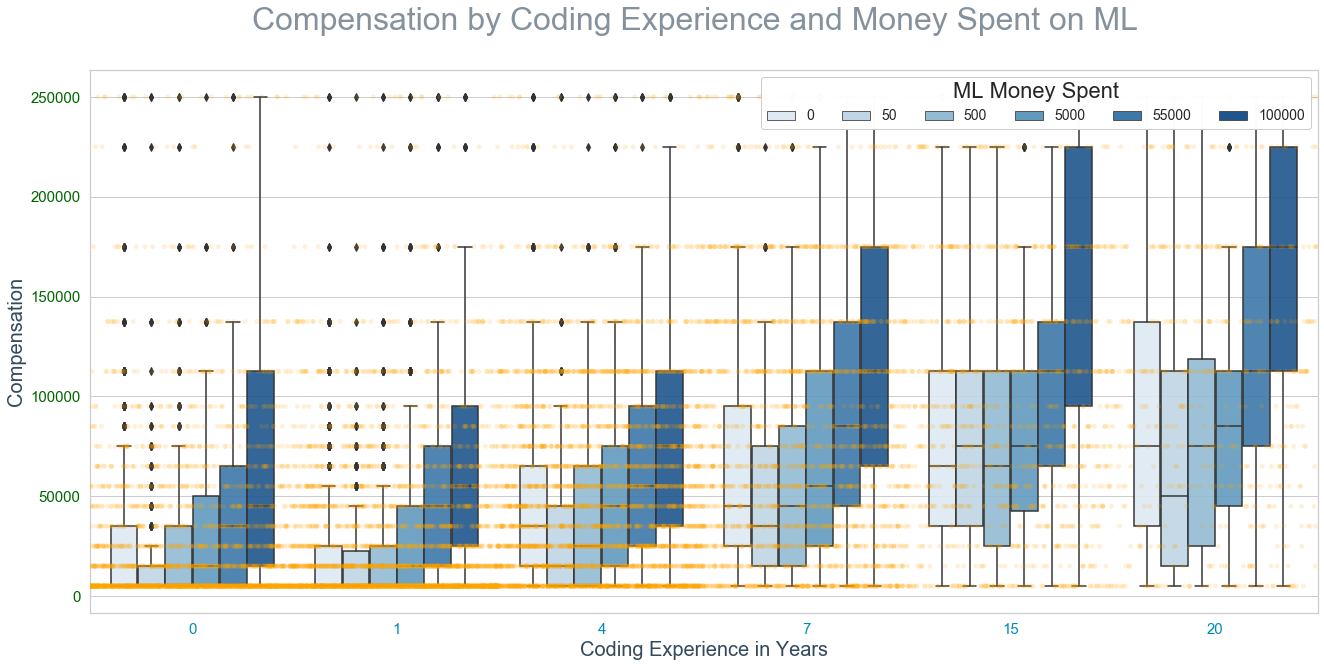

In [236]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))

ax = sns.boxplot(x='Coding Experience', y='Compensatio', data=salary, hue='ML Money Spent',color='#666666', palette="Blues")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='Coding Experience', y='Compensatio', data=salary, color="orange", jitter=0.5, size=5,alpha=0.15)

plt.title("Compensation by Coding Experience and Money Spent on ML", loc="center",size=32,color='#34495E',alpha=0.6)
plt.xlabel('Coding Experience in Years',color='#34495E',fontsize=20) 
plt.ylabel('Compensation',color='#34495E',fontsize=20)
plt.xticks(size=15,color='#008abc',rotation='horizontal', wrap=True)
plt.yticks(size=15,color='#006600')
#plt.ylim(0,200)
#plt.text(3.5, 530000, 'Courtesy: https://seaborn.pydata.org/examples/grouped_boxplot.html', fontsize=13,alpha=0.2)
plt.legend(loc="upper right",fontsize=14,ncol=7,title='ML Money Spent',title_fontsize=22,framealpha=0.99)
plt.show()

> Coding Experience: has similar effect as machine learning experience.

#### 2.1.4 Compensation by Company Size and Data Science Team Size

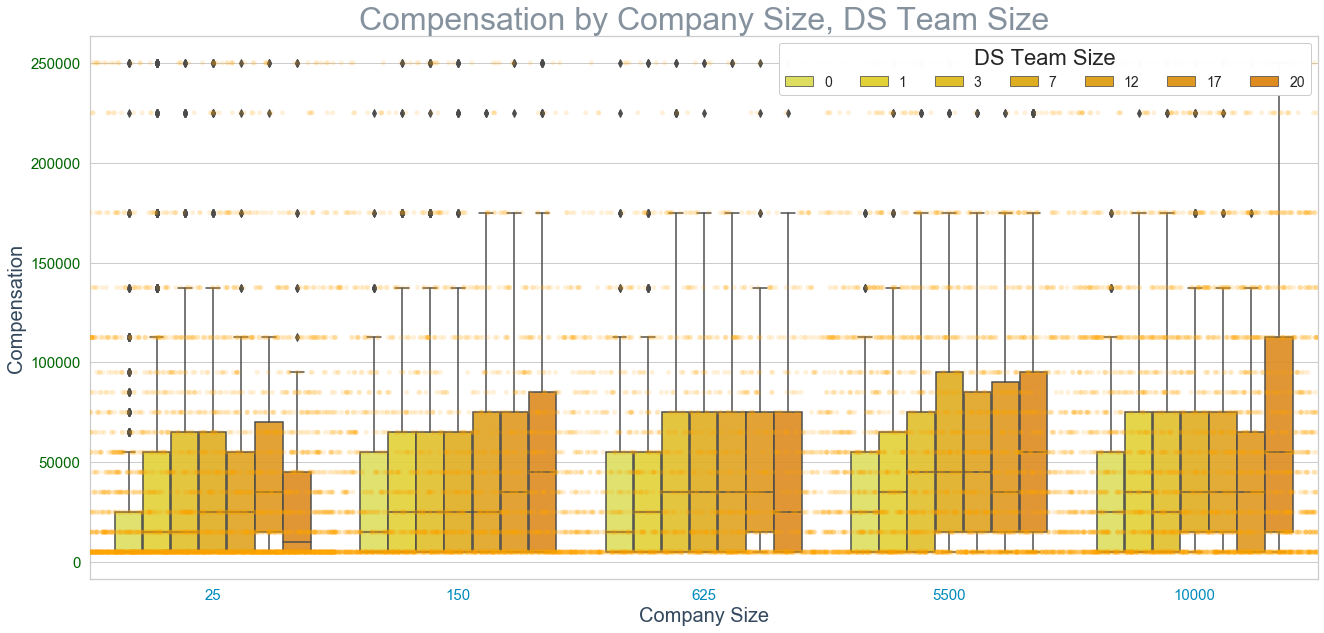

In [254]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))

ax = sns.boxplot(x="Company Size", y="Compensatio", data=salary, hue='DS Team',color='#eeeeee', palette="Wistia")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='Company Size', y='Compensatio', data=salary, color="orange", jitter=0.5, size=5,alpha=0.15)

plt.title("Compensation by Company Size, DS Team Size", loc="center",size=32,color='#34495E',alpha=0.6)
plt.xlabel('Company Size',color='#34495E',fontsize=20) 
plt.ylabel('Compensation',color='#34495E',fontsize=20)
plt.xticks(size=15,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
#plt.ylim(0,200)
plt.legend(loc="upper right",fontsize=14,ncol=7,title='DS Team Size',title_fontsize=22,framealpha=0.99)
plt.show()

> Company Size / Data Science Team siz: both has positive correlation with compensation, but the effect is not as strong as related experience.

#### 2.1.5 Compensation by Job Title and Education

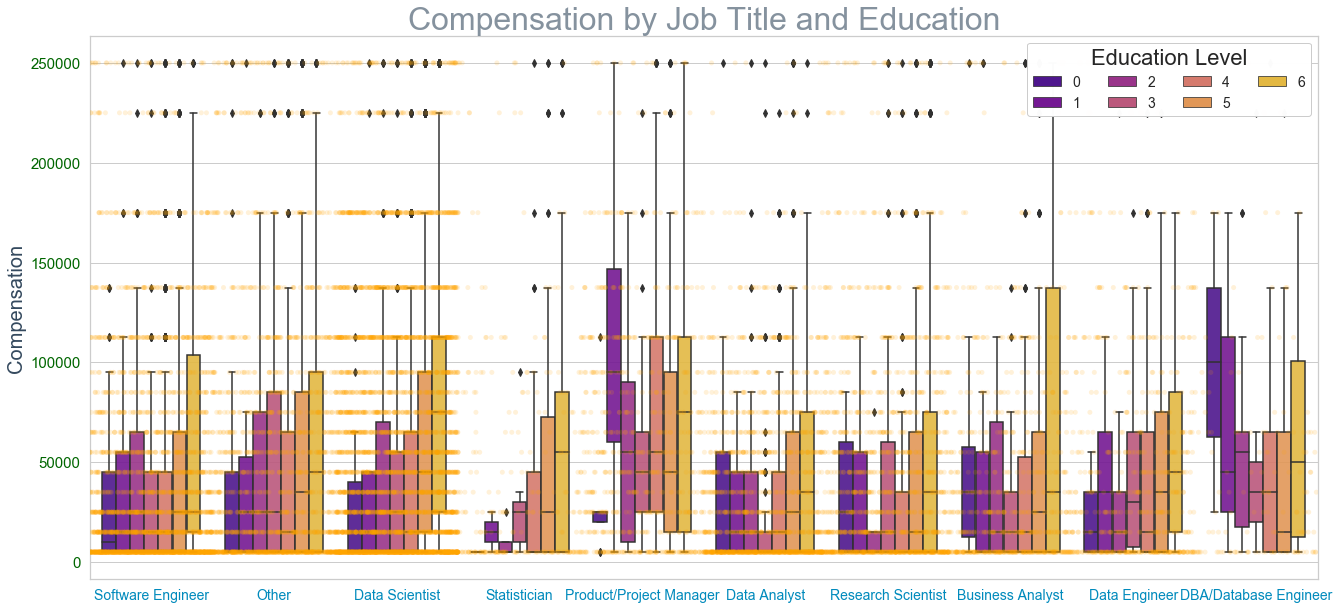

In [255]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))

ax = sns.boxplot(x="Job Title", y="Compensatio", data=salary,hue="Education_numeric",color='#666666', palette="plasma")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
ax = sns.stripplot(x='Job Title', y='Compensatio', data=salary, color="orange", jitter=0.5, size=5,alpha=0.15)

plt.title("Compensation by Job Title and Education", loc="center",size=32,color='#34495E',alpha=0.6)
plt.xlabel('',color='#34495E',fontsize=20) 
plt.ylabel('Compensation',color='#34495E',fontsize=20)
plt.xticks(size=14,color='#008abc',rotation='horizontal', wrap=True)
plt.yticks(size=15,color='#006600')
#plt.ylim(0,200)
plt.legend(loc="upper right",fontsize=14,ncol=4,title='Education Level',title_fontsize=22,framealpha=0.99)
plt.show()

> Most of the jobs' salary increase as a function of education level. But program manager and database engineer with the lowest level of education have the highest average compensation. One possible explaination is that inter personal skills play a bigger role than acedemic excellence in those kind of jobs.

In [239]:
feature = train.drop(['Q10_Encoded','Q10_buckets'], axis=1)

### 2.2 Visualize the Order of Feature Importance
b. Visualize the order of feature importance. Some possible methods include correlation plot, or
a similar method. Given the data, which of the original attributes in the data are most related to
a survey respondent’s yearly compensation?
 The steps specified before are not in a set order. 

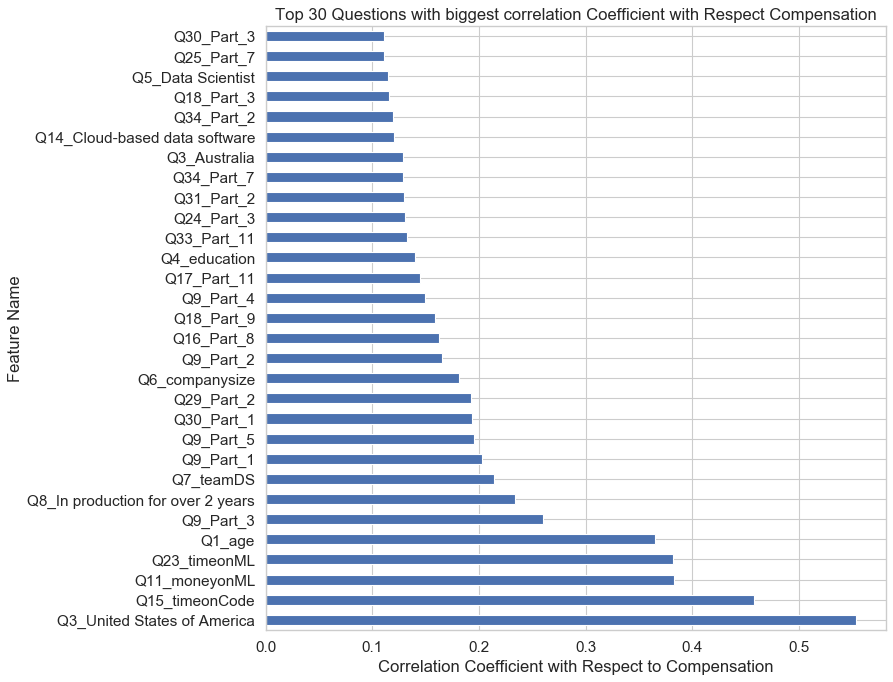

In [268]:
#get the correlation 
corr_matrix = train.drop('Q10_average', axis=1).corr()
#Generate ehe correlation heatmap for
corr_matrix.style.background_gradient(cmap=sns.diverging_palette(220, 20, as_cmap=True))
top_n = 30

largest_cols = corr_matrix.nlargest(top_n+1, 'Q10_Encoded')['Q10_Encoded']
largest_cols = largest_cols[1:]
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
largest_cols.plot(kind="barh",)
plt.xlabel('Correlation Coefficient with Respect to Compensation')
plt.ylabel('Feature Name')
plt.title('Top '+ str(top_n) + ' Questions with biggest correlation Coefficient with Respect Compensation')
locs, labels = plt.yticks()
label_str_ls = []
for lab in labels:
    label_str_ls.append(lab.get_text())
plt.yticks(np.arange(top_n), label_str_ls)
plt.show()



> As shown in the above figure, the questions that have the strongest correlation with compensation level are:
1.   Q3: In which country do you currently reside? America
2.   Q15: How long have you been writing code to analyze data (at work or at school)?
3.   Q11. Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
4.   Q23: For how many years have you used machine learning methods?
5.   Q1: What is your age (# years)?

> By analyzing the results, it can be concluded that the respondent's annual compensation is most closely related to whether the respondent reside in USA? / time spent on coding / money spent on machine learning / years spent on machine learning / current age. Moreover, it is interesting to note that the most correlated feature is whether the respondent reside in USA. One potential explaination is that the average compensation of USA respondents is much higher than those from other part of the world.

## 3. Feature selection (10 marks):
Explain how feature engineering is a useful tool in machine learning. Then select the features to
be used for analysis either manually or through some feature selection algorithm (e.g. regularized
regression).
Not all features need to be used; features can be removed or added as desired. If the resulting
number of features is very high, dimensionality reduction can also be used (e.g. PCA). Use at
least one feature selection technique – describe the technique and provide justification on why
you selected that set of features.

### 3.1 Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable. Heatmap makes it easy to identify which features are most related to the target variable.   

In [153]:
X = train.drop(['Q10_Encoded','Q10_buckets', 'Q10_average'], axis=1)
y = train['Q10_Encoded']

In [269]:
#number of top correlated features to extract
k = 35 
#number of features to show
show = 15

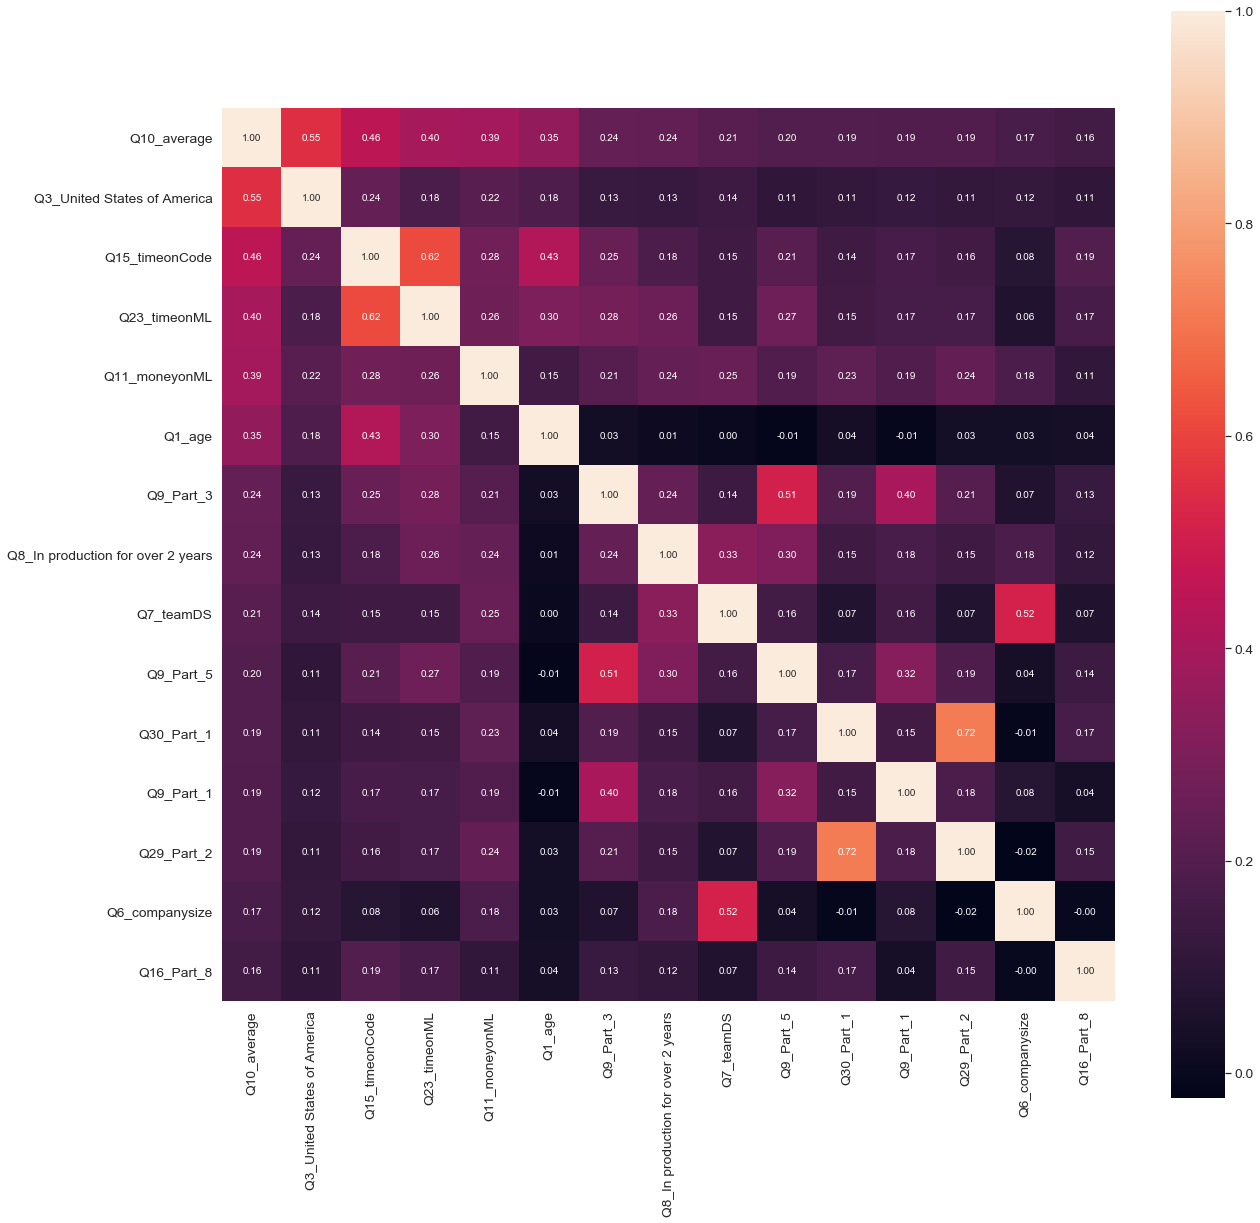

In [154]:
#compensation correlation matrix
plt.figure(figsize=(20,20))
corrmat = feature.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(show, 'Q10_average')['Q10_average'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
ax = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, \
                 yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Top 15 most correlated features are listed from top to bottom along the LHS edge with Correlation Matrix Method.

In [155]:
list_correlationMatrix = corrmat.nlargest(k+1, 'Q10_average')['Q10_average'].index.values.tolist()
list_correlationMatrix.remove('Q10_average')

### 3.2 Feature Importance

Feature importance property of model can be utilized to get relative importance of each feature in the dataset. The higher the score, more relevant is the feature with respect to your target (annual compensation). Feature importance is an built-in functionality from Tree Based Classifiers, here Extra Tree Classifier is used for feature selection.

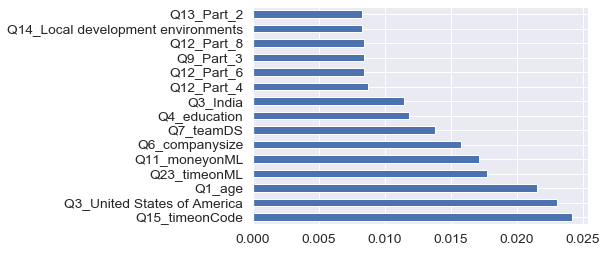

Q15_timeonCode                        0.024158
Q3_United States of America           0.023026
Q1_age                                0.021550
Q23_timeonML                          0.017719
Q11_moneyonML                         0.017124
Q6_companysize                        0.015808
Q7_teamDS                             0.013793
Q4_education                          0.011866
Q3_India                              0.011481
Q12_Part_4                            0.008749
Q12_Part_6                            0.008425
Q9_Part_3                             0.008414
Q12_Part_8                            0.008395
Q14_Local development environments    0.008303
Q13_Part_2                            0.008262
dtype: float64

In [156]:
from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(show).plot(kind='barh')
plt.show()

feat_importances.nlargest(show)

Top 15 most correlated features are listed from top to bottom along with their corresponding importance score for Feature Importance Method.

In [157]:
list_featureImportance = feat_importances.nlargest(k).index.values.tolist()

### 3.3 Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with the target.
SelectKBest class from scikit-learn can be used for feature selection. Here we used the chi-squared (chi²) statistical test to select most correlated features.

In [158]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(show,'Score'))  #print 10 best features

                                 Specs         Score
244                      Q11_moneyonML  1.204719e+08
242                     Q6_companysize  2.326409e+06
245                     Q15_timeonCode  1.704016e+04
247                       Q23_timeonML  1.054795e+04
240                             Q1_age  5.454229e+03
243                          Q7_teamDS  5.057012e+03
289        Q3_United States of America  3.613226e+03
261                           Q3_India  1.142654e+03
246                            Q22_TPU  9.282214e+02
219  Q8_In production for over 2 years  6.080420e+02
2                            Q9_Part_3  5.595024e+02
142                         Q30_Part_1  4.543829e+02
131                         Q29_Part_2  4.108383e+02
259                         Q3_Germany  3.869095e+02
4                            Q9_Part_5  3.822571e+02


Top 15 most correlated features are listed from top to bottom along with their corresponding feature score for Univariate Selection Method.

In [159]:
list_univariateSelection = featureScores.nlargest(k,'Score').Specs.tolist()

### 3.4 Different Feature Selection Method Comparison
Refer to section 4.3

## 4.Model implementation (25 marks):
Implement logistic regression algorithm on the training data using 10-fold cross-validation. How
does your model accuracy compare across the folds? What is average and variance of accuracy for
folds? Treating each value of hyperparameter(s) as a new model, which model performed best?
Give the reason based on bias-variance trade-off. An output of your algorithm should be a
probability of belonging to each of the salary buckets. Apply scaling/normalization of features, if
necessary.

In [108]:
X = train.drop(['Q10_Encoded','Q10_buckets', 'Q10_average'], axis=1)
X_c = train[list_correlationMatrix]
X_f = train[list_featureImportance]
X_u = train[list_univariateSelection]
y = train['Q10_Encoded']

In [110]:
salary_buckets_label = ['0-9,999','10,000-19,999','20,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999',\
                        '60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999',\
                        '125,000-149,999','150,000-199,999', '200,000-249,999','>250,000']

### 4.1 Implimenting Logistic regression Model
Dataset is splited into 70% testing data and 30% training data.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def accuracy_calculation(X,y,n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    warnings.filterwarnings("ignore")
    model = LogisticRegression()    
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    ACC = accuracy_score(y_test, predictions)
    
#     TN = confusion_matrix(y_test, predictions)[0][0]
#     FP = confusion_matrix(y_test, predictions)[0][1]
#     FN = confusion_matrix(y_test, predictions)[1][0]
#     TP = confusion_matrix(y_test, predictions)[1][1]
#     total = TN + FP + FN + TP
#     ACC = (TP + TN) / float(total)

    print ("Without cross validation:")
    print(classification_report(y_test, predictions, target_names=salary_buckets_label))
    print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))
    print ("With cross validation")

    model = LogisticRegression()
    scaler = StandardScaler()
    kfold = KFold(n_splits=n)
    kfold.get_n_splits(X)

    accuracy = np.zeros(n)
    np_idx = 0

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        ACC = accuracy_score(y_test, predictions)

#         TN = confusion_matrix(y_test, predictions)[0][0]
#         FP = confusion_matrix(y_test, predictions)[0][1]
#         FN = confusion_matrix(y_test, predictions)[1][0]
#         TP = confusion_matrix(y_test, predictions)[1][1]
#         total = TN + FP + FN + TP
#         ACC = (TP + TN) / float(total)

        accuracy[np_idx] = ACC*100
        np_idx += 1

        print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))
        #print(classification_report(y_test, predictions, target_names=salary_buckets_label))

    print ("Average accuracy: {}%".format(round(np.mean(accuracy),3)))
    print ("Variance: {}".format(round(np.var(accuracy),3)))

### 4.2  Answer: "How does your model accuracy compare across the folds? What is average and variance of accuracy for folds?"

In [270]:
print("Base Logistic Regression without Feature Selection")
accuracy_calculation(X,y,10)

Base Logistic Regression without Feature Selection
Without cross validation:
                 precision    recall  f1-score   support

        0-9,999       0.53      0.85      0.65      1194
  10,000-19,999       0.27      0.15      0.19       405
  20,000-29,999       0.18      0.13      0.15       281
  30,000-39,999       0.16      0.10      0.12       224
  40,000-49,999       0.16      0.08      0.11       221
  50,000-59,999       0.14      0.06      0.09       218
  60,000-69,999       0.14      0.10      0.12       173
  70,000-79,999       0.11      0.07      0.09       159
  80,000-89,999       0.11      0.09      0.10       113
  90,000-99,999       0.09      0.06      0.07       125
100,000-124,999       0.19      0.22      0.20       221
125,000-149,999       0.14      0.15      0.15       150
150,000-199,999       0.23      0.20      0.21       143
200,000-249,999       0.10      0.07      0.08        56
       >250,000       0.18      0.24      0.21        67

       ac

>The accuracy before cross validation is 35.52%. The accuracy across all folds are shown above with a average of 35.978% and a variance of 18.593.

### 4.3 Different Feature Selection Method Comparison

In [271]:
print("With Feature Selection: Correlation Matrix")
accuracy_calculation(X_c,y,10)

With Feature Selection: Correlation Matrix
Without cross validation:
                 precision    recall  f1-score   support

        0-9,999       0.43      0.94      0.59      1194
  10,000-19,999       0.14      0.03      0.05       405
  20,000-29,999       0.11      0.05      0.07       281
  30,000-39,999       0.05      0.01      0.02       224
  40,000-49,999       0.07      0.03      0.04       221
  50,000-59,999       0.10      0.03      0.05       218
  60,000-69,999       0.22      0.01      0.02       173
  70,000-79,999       0.00      0.00      0.00       159
  80,000-89,999       0.00      0.00      0.00       113
  90,000-99,999       0.00      0.00      0.00       125
100,000-124,999       0.15      0.26      0.19       221
125,000-149,999       0.19      0.18      0.18       150
150,000-199,999       0.25      0.16      0.20       143
200,000-249,999       0.00      0.00      0.00        56
       >250,000       0.21      0.18      0.19        67

       accuracy  

In [152]:
print("With Feature Selection: Feature Importance")
accuracy_calculation(X_f,y,10)

Without cross validation:
                 precision    recall  f1-score   support

        0-9,999       0.43      0.94      0.59      1194
  10,000-19,999       0.09      0.02      0.03       405
  20,000-29,999       0.10      0.04      0.06       281
  30,000-39,999       0.13      0.03      0.05       224
  40,000-49,999       0.07      0.02      0.03       221
  50,000-59,999       0.06      0.02      0.03       218
  60,000-69,999       0.12      0.02      0.03       173
  70,000-79,999       0.07      0.01      0.01       159
  80,000-89,999       0.00      0.00      0.00       113
  90,000-99,999       0.00      0.00      0.00       125
100,000-124,999       0.13      0.22      0.16       221
125,000-149,999       0.19      0.17      0.18       150
150,000-199,999       0.27      0.23      0.25       143
200,000-249,999       0.50      0.02      0.03        56
       >250,000       0.22      0.16      0.19        67

       accuracy                           0.34      3750
   

In [133]:
print("With Feature Selection: Univariate Selection")
accuracy_calculation(X_u,y,10)

Without cross validation:
                 precision    recall  f1-score   support

        0-9,999       0.46      0.94      0.62      1194
  10,000-19,999       0.14      0.03      0.05       405
  20,000-29,999       0.10      0.06      0.07       281
  30,000-39,999       0.20      0.06      0.09       224
  40,000-49,999       0.20      0.08      0.12       221
  50,000-59,999       0.13      0.04      0.06       218
  60,000-69,999       0.16      0.12      0.14       173
  70,000-79,999       0.14      0.02      0.03       159
  80,000-89,999       0.08      0.01      0.02       113
  90,000-99,999       0.33      0.01      0.02       125
100,000-124,999       0.15      0.27      0.19       221
125,000-149,999       0.20      0.17      0.18       150
150,000-199,999       0.32      0.26      0.28       143
200,000-249,999       0.00      0.00      0.00        56
       >250,000       0.25      0.21      0.23        67

       accuracy                           0.36      3750
   

>For Correlation Matrix Method, the accuracy before cross validation is 34.32%. The accuracy across all folds are shown above with a average of 34.754% and a variance of 21.757.

>For Feature Importance Method, the accuracy before cross validation is 34.29%. The accuracy across all folds are shown above with a average of 34.882% and a variance of 19.076.

>For Univariate Selection Method, the accuracy before cross validation is 35.89%. The accuracy across all folds are shown above with a average of 35.85% and a variance of 18.526.

>Overall, Univariate Selection Method has the highest accuracy and the lowest variance, proven to be the best among all three methods.

### 4.4 Probability of belonging to each of the salary buckets

In [173]:
def bucket_proba(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    warnings.filterwarnings("ignore")
    model = LogisticRegression()    
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    np_prob = (100 * model.predict_proba(X_test)).round(2)
    bucket_title = []
    for i in range(15):
        bucket_title.append("Bkt"+str(i)+"(%)")
    df = pd.DataFrame(data=np_prob, columns = bucket_title)
    #df['y_pred'] = np.array(predictions)
    #df['y_true'] = np.array(y_test)
    return df

In [174]:
bucket_org = bucket_proba(X,y)
bucket_c = bucket_proba(X_c,y)
bucket_f = bucket_proba(X_f,y)
bucket_u = bucket_proba(X_u,y)

#### 4.4.1 Bucket probability before feature selection

In [178]:
bucket_org

,Bkt0(%),Bkt1(%),Bkt2(%),Bkt3(%),Bkt4(%),Bkt5(%),Bkt6(%),Bkt7(%),Bkt8(%),Bkt9(%),Bkt10(%),Bkt11(%),Bkt12(%),Bkt13(%),Bkt14(%)
0,40.16,10.63,7.95,15.71,3.32,2.92,6.03,2.21,0.13,0.19,5.48,2.47,0.35,2.44,0.01
1,64.38,26.32,4.57,1.31,0.09,2.86,0.04,0.05,0.24,0.02,0.03,0.03,0.04,0.00,0.01
2,0.50,1.47,0.60,3.00,5.65,17.83,12.22,1.71,2.85,3.78,4.40,2.87,5.88,0.29,36.97
3,24.23,3.86,1.60,3.42,3.27,8.97,3.08,9.66,5.58,7.28,14.77,10.90,3.06,0.29,0.03
4,37.76,8.21,25.83,5.17,11.20,3.59,2.00,2.97,0.32,0.03,2.68,0.21,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,76.30,8.38,3.47,0.43,1.73,0.63,0.50,5.65,0.00,0.02,0.44,0.52,0.06,0.00,1.86
3746,76.64,14.11,0.78,5.81,0.81,0.69,0.08,0.13,0.08,0.02,0.38,0.03,0.25,0.19,0.00
3747,65.96,10.10,8.79,2.72,3.18,3.79,1.35,0.85,0.04,1.48,1.09,0.02,0.22,0.00,0.40
3748,20.06,29.64,19.97,12.29,2.81,3.62,2.53,2.75,0.55,0.81,3.15,0.14,0.95,0.72,0.00


#### 4.4.2 Bucket probability after Correlation Matrix Method

In [175]:
bucket_c

,Bkt0(%),Bkt1(%),Bkt2(%),Bkt3(%),Bkt4(%),Bkt5(%),Bkt6(%),Bkt7(%),Bkt8(%),Bkt9(%),Bkt10(%),Bkt11(%),Bkt12(%),Bkt13(%),Bkt14(%)
0,38.71,9.46,8.22,7.97,9.39,6.32,5.01,4.15,1.81,2.23,3.46,1.62,1.02,0.29,0.36
1,37.92,20.65,10.34,4.97,6.58,4.81,4.09,3.87,1.91,1.48,2.23,0.55,0.23,0.22,0.14
2,2.00,4.58,4.87,4.70,8.27,11.09,9.23,3.63,5.29,6.29,13.69,4.19,2.23,6.12,13.80
3,19.66,2.86,2.04,1.94,2.62,4.72,5.80,10.03,7.86,8.83,15.26,10.63,5.79,1.11,0.85
4,55.06,11.70,7.47,5.81,4.69,4.39,2.94,2.48,1.65,0.81,1.48,0.43,0.38,0.21,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,41.96,13.25,11.50,5.41,5.25,7.58,3.61,1.97,1.48,2.84,1.32,2.56,0.86,0.06,0.33
3746,48.06,14.30,9.81,5.10,5.90,3.99,3.30,3.91,1.42,1.25,1.68,0.59,0.26,0.16,0.28
3747,55.78,18.43,5.98,4.63,3.10,4.14,1.83,1.60,1.04,0.79,1.46,0.44,0.43,0.08,0.27
3748,25.59,16.50,9.96,10.32,7.01,9.08,4.15,4.37,3.22,3.54,3.32,0.81,1.05,0.73,0.35


#### 4.4.3 Bucket probability after Feature Importance Method

In [176]:
bucket_f

,Bkt0(%),Bkt1(%),Bkt2(%),Bkt3(%),Bkt4(%),Bkt5(%),Bkt6(%),Bkt7(%),Bkt8(%),Bkt9(%),Bkt10(%),Bkt11(%),Bkt12(%),Bkt13(%),Bkt14(%)
0,34.79,9.46,7.64,8.52,8.74,6.75,3.93,4.15,2.37,3.44,5.42,2.47,1.57,0.31,0.42
1,21.43,19.02,11.42,6.45,8.55,6.13,8.66,7.11,2.60,1.79,4.70,1.03,0.63,0.22,0.25
2,1.45,3.38,4.79,4.08,8.42,11.89,9.34,5.15,5.87,7.28,14.97,5.17,3.57,5.68,8.96
3,24.36,3.22,1.89,1.98,2.71,4.22,4.10,8.61,6.34,7.79,13.78,15.18,4.12,0.90,0.80
4,47.14,11.54,10.22,5.60,6.38,5.74,3.28,3.94,2.01,0.78,1.81,0.58,0.38,0.32,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,60.19,17.62,9.79,4.41,2.12,2.04,0.78,0.76,0.41,0.32,0.35,0.37,0.27,0.22,0.36
3746,45.20,13.37,5.52,6.98,7.99,5.16,4.77,3.78,1.55,1.90,1.70,1.09,0.36,0.12,0.51
3747,52.44,25.75,9.17,4.74,1.83,2.37,0.98,0.95,0.38,0.24,0.69,0.11,0.11,0.07,0.18
3748,24.92,28.58,13.90,6.07,4.44,6.26,3.88,3.92,1.42,1.29,2.09,0.40,0.48,0.99,1.37


#### 4.4.4 Bucket probability after Univariate Selection method

In [177]:
bucket_u

,Bkt0(%),Bkt1(%),Bkt2(%),Bkt3(%),Bkt4(%),Bkt5(%),Bkt6(%),Bkt7(%),Bkt8(%),Bkt9(%),Bkt10(%),Bkt11(%),Bkt12(%),Bkt13(%),Bkt14(%)
0,48.05,10.18,8.83,5.74,6.37,5.03,3.54,2.74,1.91,2.18,3.12,1.03,0.67,0.22,0.42
1,34.79,19.39,11.57,6.65,7.29,5.44,4.35,3.50,2.01,1.36,2.29,0.77,0.24,0.18,0.16
2,3.21,6.86,7.49,5.41,7.64,9.36,6.10,2.51,5.85,5.43,12.11,3.99,2.84,4.48,16.73
3,23.38,2.53,2.05,1.99,2.35,5.32,6.39,10.72,5.83,4.90,15.28,9.46,6.99,1.90,0.91
4,57.98,10.26,7.99,5.49,4.48,3.78,2.37,2.11,1.64,0.89,1.55,0.43,0.38,0.14,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,55.01,21.97,11.93,3.10,1.84,1.36,0.86,1.04,0.34,0.38,0.76,0.57,0.27,0.27,0.30
3746,80.55,10.36,2.97,2.20,1.80,0.77,0.11,0.12,0.08,0.06,0.73,0.08,0.05,0.09,0.03
3747,63.53,18.06,6.53,3.86,2.45,2.16,0.76,0.75,0.20,0.30,0.55,0.18,0.25,0.07,0.35
3748,33.27,23.64,13.13,9.05,4.37,5.07,2.63,1.90,1.06,1.33,1.97,0.54,0.81,0.70,0.54


### 4.5 Answer "Treating each value of hyperparameter(s) as a new model, which model performed best? Give the reason based on bias-variance trade-off."

In [274]:
# From tutorial plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

In [290]:
def get_learning_curve_plot(model, X, y):
    #this function returns the learning plot of the model
    plt.figure(figsize=(10,6))
    #get learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='accuracy', train_sizes=np.linspace(.1, 1.0, 5), n_jobs=5,cv=None)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #fill the range of the score
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    #plot the score trend
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="The learning curve for the training set")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="The learning curve for the cross-validation set")
    plt.legend(loc="best")
    plt.grid()
    plt.ylim(0,1)
    plt.title('Logistic Regression Learning Curve with C='+ str(C))
    plt.xlabel("# of training data")
    plt.ylabel('Accuracy Score')
    plt.show()

Train & Validate Logistic Regression Model with C= 0.0001


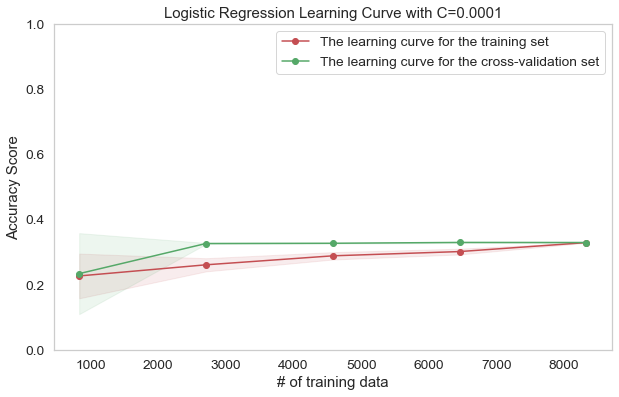

Train & Validate Logistic Regression Model with C= 0.01


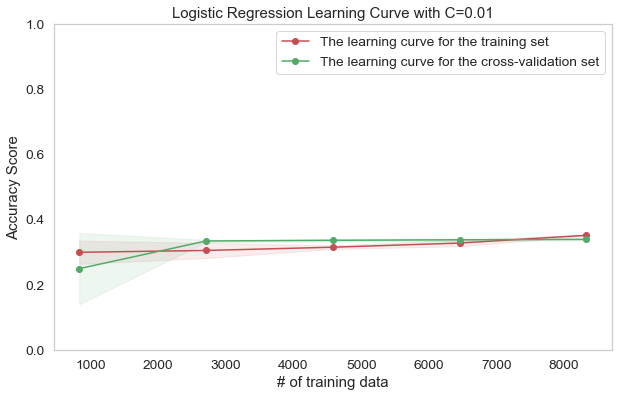

Train & Validate Logistic Regression Model with C= 1


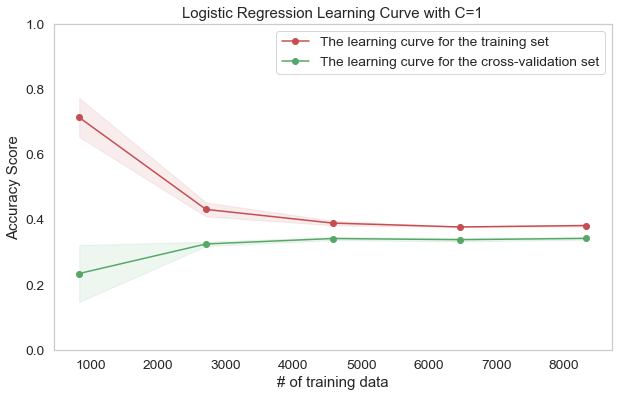

Train & Validate Logistic Regression Model with C= 100


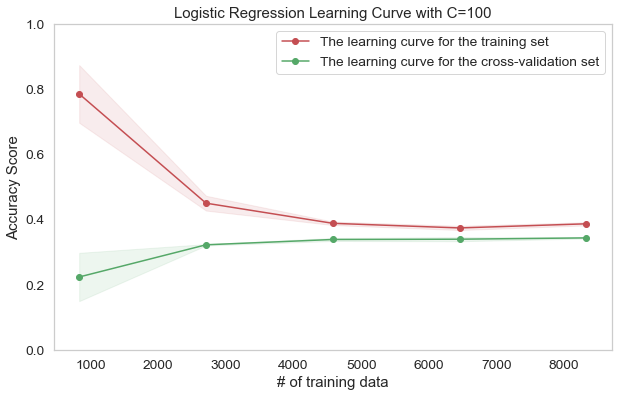

Train & Validate Logistic Regression Model with C= 10000


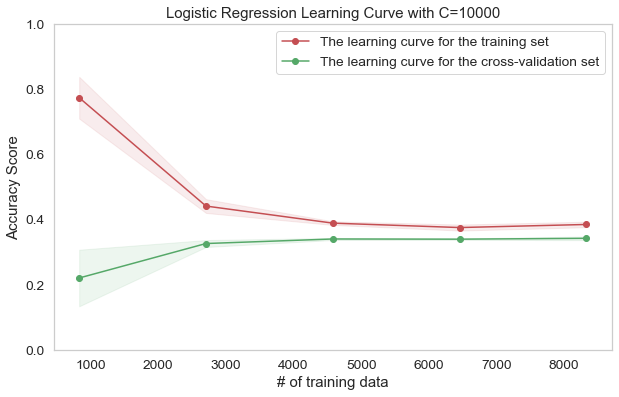

In [291]:
C_vals = [0.0001,0.01,1,100, 10000] #some different value of the C in logistic regression to try

for C in C_vals:
    print("===========================================================")
    print("Train & Validate Logistic Regression Model with C=",C)

    mModel = LogisticRegression(C=C)
    get_learning_curve_plot(mModel, X, y)

> With small C value, the training score is close to the testing score. This indicates that the model has high bias. Also both training and testing score are low accuracy score. This indicates that the model has high bias

> With large C value, the gap between training and testing score becomes smaller and smaller as number of training data increases. This indicates that the model has low variance and high bias.

<img src="https://raw.githubusercontent.com/YixiaoHong/Kaggle_Salary_Data_Analysis/master/src/low_high_bias.png" width="600">
<img src="https://raw.githubusercontent.com/YixiaoHong/Kaggle_Salary_Data_Analysis/master/src/low_high_var.png" width="600">

## 5.Model tuning (20 marks):
Improve the performance of the models from the previous step with hyperparameter tuning and
select a final optimal model using grid search based on a metric (or metrics) that you choose.
Choosing an optimal model for a given task (comparing multiple classifiers on a specific domain)
requires selecting performance measures, for example accuracy, precision, recall and/or F1-score
to compare the model performance.
There is no minimum model accuracy, as long as your methodology is reasonable and well
explained. 

In [292]:
from sklearn.metrics import mean_squared_error
def parameter_tuning(X,y):  
    steps_c=np.array([0.001,0.01,0.05,0.1,0.5,1,1.5,2,5,7,8,9,10,50,100,200,500,1000,1500,2000,2500,3000,4500,5000,5500,10000,50000])
    trainErrC = np.zeros(steps_c.shape)
    testErrC = np.zeros(steps_c.shape)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=0.3)
    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    for i, step in enumerate(steps_c):
        # Create model_tune instance
        model_tune=LogisticRegression(C=step)
        # Train model_tune
        model_tune.fit(X_train, Y_train.ravel())

        # Make Predictions
        y_train_pred = model_tune.predict(X_train)
        y_test_pred = model_tune.predict(X_test)

        y_train_pred=y_train_pred.reshape(-1,1)
        y_test_pred=y_test_pred.reshape(-1,1)

        # Calculate Error
        trainErrC[i] = np.sqrt(mean_squared_error(Y_train, y_train_pred))
        testErrC[i] = np.sqrt(mean_squared_error(Y_test, y_test_pred))

    plt.figure(figsize=(12,5))
    plt.plot(np.log(steps_c),trainErrC,'r',label='Training Error')
    plt.plot(np.log(steps_c),testErrC,'g',label='Testing Error')

    test_loss_min=testErrC.min()
    test_loss_min=testErrC.min()
    index=testErrC.argmin() 
    deg_min = np.log(steps_c[index])

    plt.title("RMSE")
    plt.xlabel("Log(C)")
    plt.ylabel("RMSE")
    plt.legend(loc=1)
    print('Minimum Testing Error = {} at C = {}'.format(round(test_loss_min,3), round(deg_min,3)))

### 5.1 Model Performace Evaluation
Root mean square error (RMSE) of the compensation encode bucket is used to evaluate the performance of different hyperparameter C values. The C value associated with the smallest RMSE is computed with respect to different feature selection method.

RMSE without feature selection:
Minimum Testing Error = 3.458 at C = -2.303


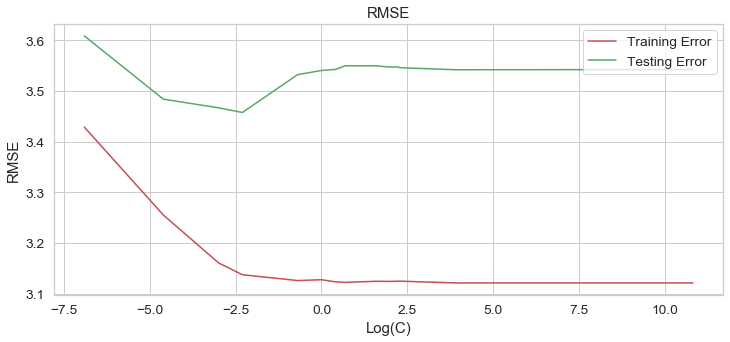

In [293]:
print("RMSE without feature selection:")
parameter_tuning(X,y)

RMSE with correlation matrix method:
Minimum Testing Error = 3.954 at C = 0.0


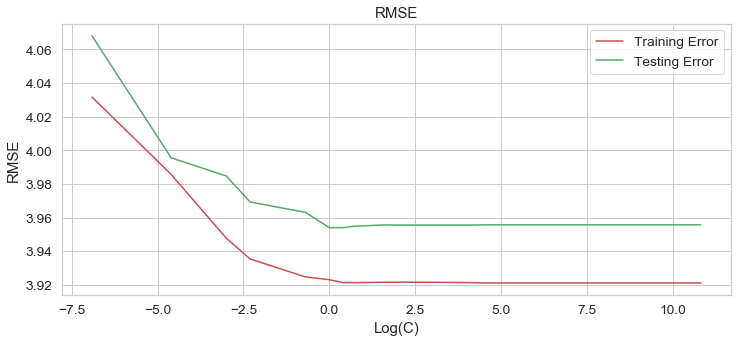

In [294]:
print("RMSE with correlation matrix method:")
parameter_tuning(X_c,y)

RMSE with feature importance method:
Minimum Testing Error = 3.992 at C = 2.197


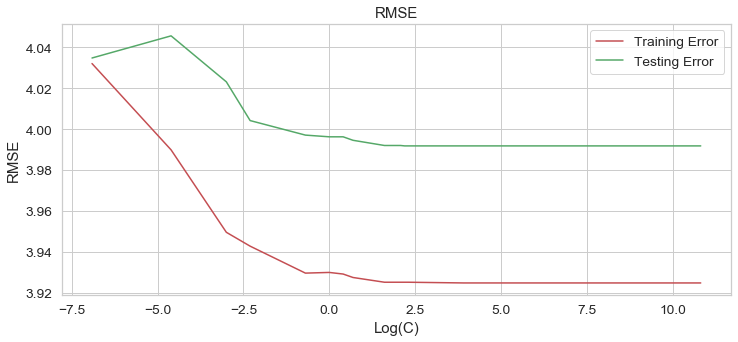

In [295]:
print("RMSE with feature importance method:")
parameter_tuning(X_f,y)

RMSE with univariate selection method:
Minimum Testing Error = 3.734 at C = 0.0


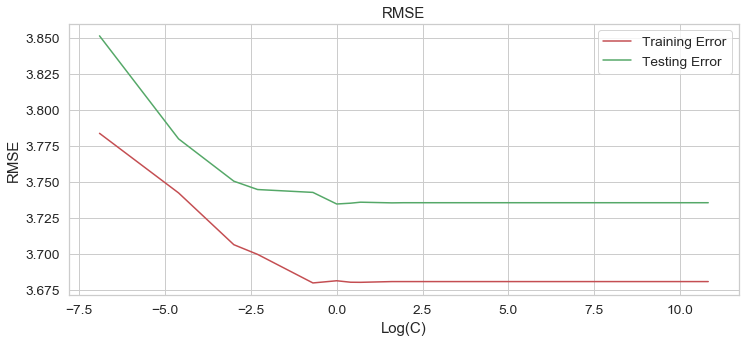

In [296]:
print("RMSE with univariate selection method:")
parameter_tuning(X_u,y)

## 6.Testing & Discussion (10 marks):
Use your optimal model to make classifications on the test set. How does your model perform on
the test set vs. the training set? The overall fit of the model, how to increase the accuracy (test,
training)? Is it overfitting or underfitting? Why? Plot the distribution.
Insufficient discussion will lead to the deduction on marks. 

#### 6.1 Overall tread
Compensation distribution is heavily skewed to the left with over 20% people having an annual compensation of less than 10000 USD. Over 50% samples fail into the lowest four compensation buckets.

#### 6.1 Feature Specific Observation
ML money spent: According to the above figure, the respondent who spent moderate amount of money on machine learning has the lowest income. Respondent who spent the most amount of money has the highest average income. Respondent who barely spent any money has medium income.

ML experience: generally, respondent with more experience has higher income.

Coding Experience: has similar effect as machine learning experience.

Company Size / Data Science Team siz: both has positive correlation with compensation, but the effect is not as strong as related experience.

Most of the jobs' salary increase as a function of education level. But program manager and database engineer with the lowest level of education have the highest average compensation. One possible explaination is that inter personal skills play a bigger role than acedemic excellence in those kind of jobs.

#### 6.2 Most Correlated Questions
the questions that have the strongest correlation with compensation level are:

Q3: In which country do you currently reside? America   
Q15: How long have you been writing code to analyze data (at work or at school)?   
Q11. Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?     
Q23: For how many years have you used machine learning methods?   
Q1: What is your age (# years)?    
By analyzing the results, it can be concluded that the respondent's annual compensation is most closely related to whether the respondent reside in USA? / time spent on coding / money spent on machine learning / years spent on machine learning / current age. Moreover, it is interesting to note that the most correlated feature is whether the respondent reside in USA. One potential explaination is that the average compensation of USA respondents is much higher than those from other part of the world.

#### 6.3 Different Feature Selection Method Comparison
For Correlation Matrix Method, the accuracy before cross validation is 34.32%. The accuracy across all folds are shown above with a average of 34.754% and a variance of 21.757.

For Feature Importance Method, the accuracy before cross validation is 34.29%. The accuracy across all folds are shown above with a average of 34.882% and a variance of 19.076.

For Univariate Selection Method, the accuracy before cross validation is 35.89%. The accuracy across all folds are shown above with a average of 35.85% and a variance of 18.526.

Overall, Univariate Selection Method has the highest accuracy and the lowest variance, proven to be the best among all three methods.

#### 6.4 Model Performance Evaluation
According to a grid search on hyperparamter C, the optimal C value is really close to zero. After the optimal threshold, the model shows no furthur improvements. This indicates that the linear model is significantly underfitting, therefore increasing the penalty on the regularizer is not contributing much to the overall performance of the model. In order improve the performance of the current model, non-linear method needs to be introduced.

#### 6.5 Model prediction probability distribution for each salary bucket

In [297]:
bucket_org

,Bkt0(%),Bkt1(%),Bkt2(%),Bkt3(%),Bkt4(%),Bkt5(%),Bkt6(%),Bkt7(%),Bkt8(%),Bkt9(%),Bkt10(%),Bkt11(%),Bkt12(%),Bkt13(%),Bkt14(%)
0,40.16,10.63,7.95,15.71,3.32,2.92,6.03,2.21,0.13,0.19,5.48,2.47,0.35,2.44,0.01
1,64.38,26.32,4.57,1.31,0.09,2.86,0.04,0.05,0.24,0.02,0.03,0.03,0.04,0.00,0.01
2,0.50,1.47,0.60,3.00,5.65,17.83,12.22,1.71,2.85,3.78,4.40,2.87,5.88,0.29,36.97
3,24.23,3.86,1.60,3.42,3.27,8.97,3.08,9.66,5.58,7.28,14.77,10.90,3.06,0.29,0.03
4,37.76,8.21,25.83,5.17,11.20,3.59,2.00,2.97,0.32,0.03,2.68,0.21,0.02,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,76.30,8.38,3.47,0.43,1.73,0.63,0.50,5.65,0.00,0.02,0.44,0.52,0.06,0.00,1.86
3746,76.64,14.11,0.78,5.81,0.81,0.69,0.08,0.13,0.08,0.02,0.38,0.03,0.25,0.19,0.00
3747,65.96,10.10,8.79,2.72,3.18,3.79,1.35,0.85,0.04,1.48,1.09,0.02,0.22,0.00,0.40
3748,20.06,29.64,19.97,12.29,2.81,3.62,2.53,2.75,0.55,0.81,3.15,0.14,0.95,0.72,0.00
